In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### SIMPLE LINEAR REGRESSION

#### NON LINEAR DATA

In [ ]:
'''

MODEL EQUATION :- Y = X1^2

PRACTICAL EXAMPLE - AREA OF A CIRCLE 

'''

In [1]:
dictionary  = {}

In [2]:
# lets create a dataset which has the area of 500 circles of different radius

for r in range(1,501):
    if r==1:
        dictionary['Radius']=[r]
        dictionary['Area']=[3.14*r*r]
    else:
        dictionary['Radius'].append(r)
        dictionary['Area'].append(3.14*r*r)

In [5]:
data_nonlinear = pd.DataFrame(dictionary)
data_nonlinear.head()

,Radius,Area
0,1,3.14
1,2,12.56
2,3,28.26
3,4,50.24
4,5,78.50


#### LINEARITY CHECK - WITH BASE MODEL

In [94]:
X = data_nonlinear['Radius']
y = data_nonlinear['Area']

In [95]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
predictions = lin_reg.predict(X_constant)
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Area   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7500.
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          2.16e-302
Time:                        10:30:00   Log-Likelihood:                -6197.9
No. Observations:                 500   AIC:                         1.240e+04
Df Residuals:                     498   BIC:                         1.241e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.316e+05   5251.655    -25.062      0.000   -1.42e+05   -1.21e+05
Radius      1573.1400     18.165     86.603      0.000    1537.450    1608.830
==============================================================================
Omnibus:                       80.336   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.320
Skew:                           0.639   Prob(JB):                     1.95e-11
Kurtosis:                       2.143   Cond. No.                         579.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

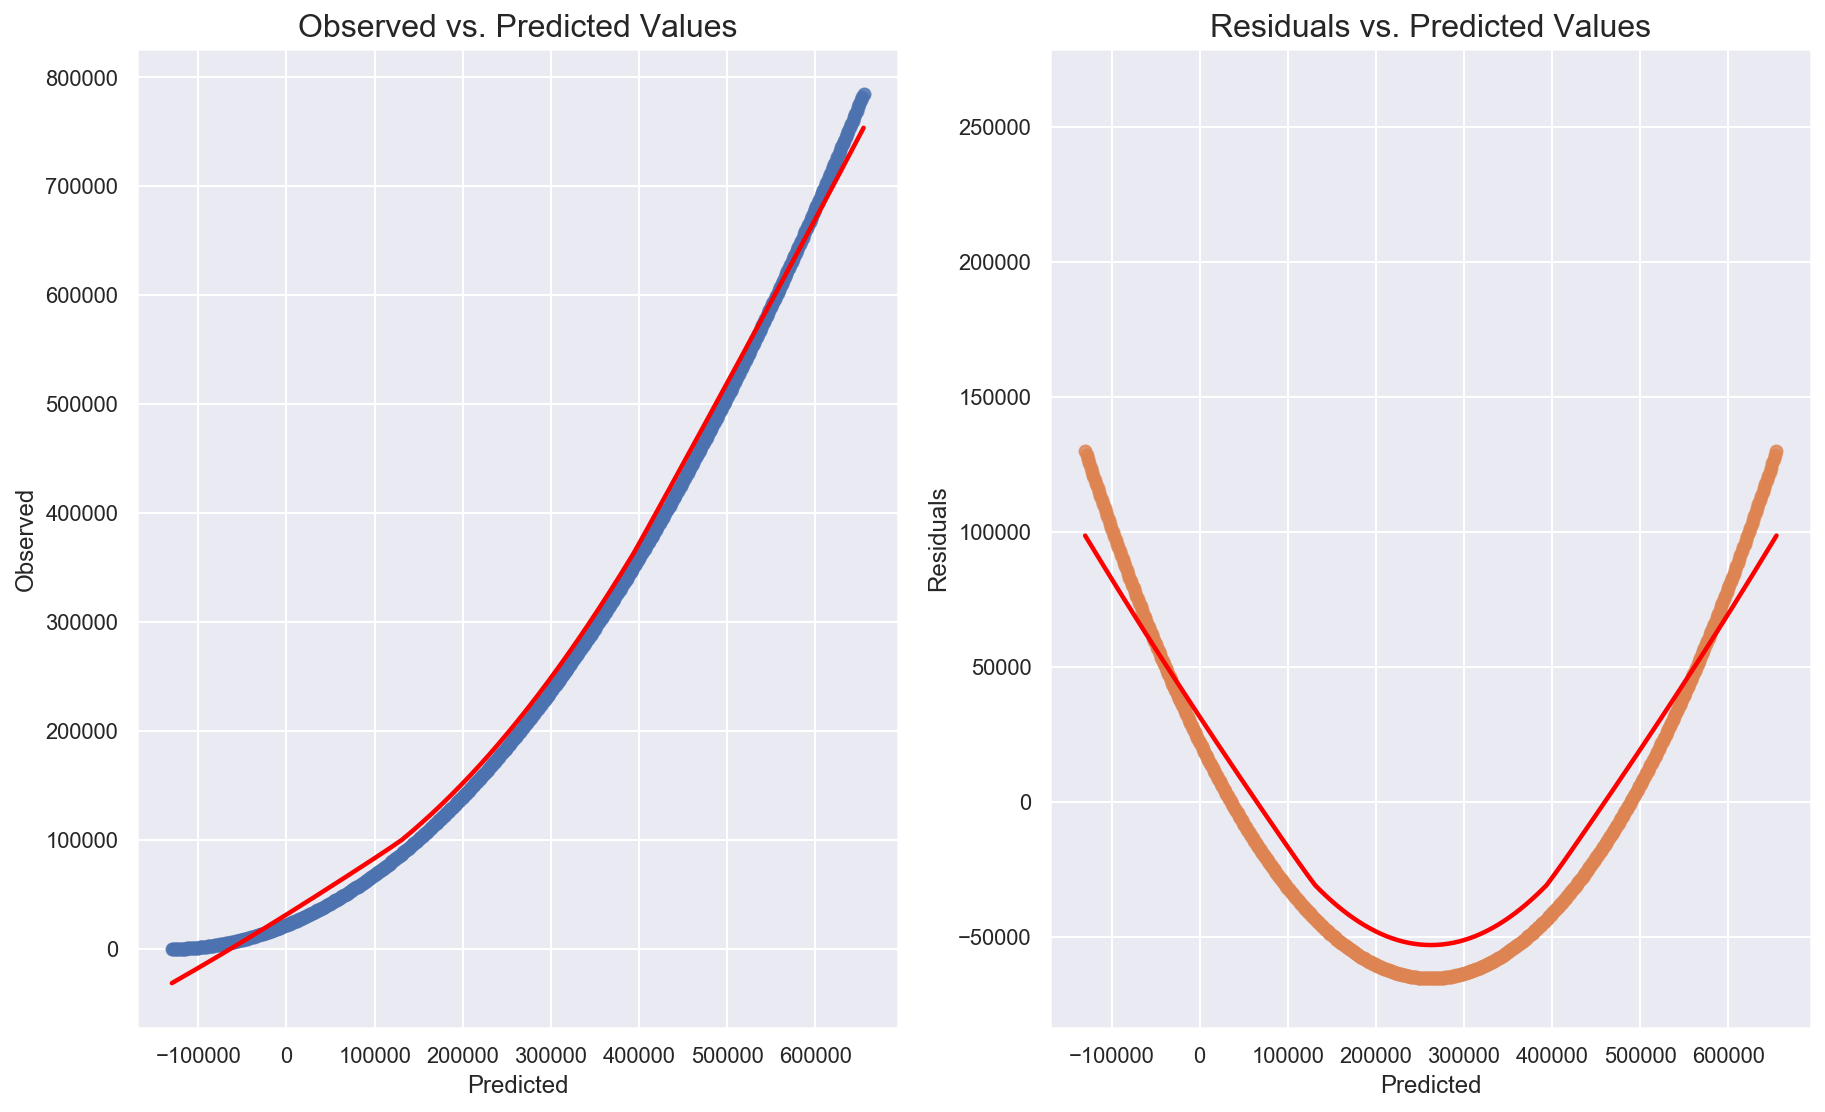

In [89]:
# linearity assumption - graphical test

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

In [67]:
# expectation residual mean has to be zero
lin_reg.resid.mean()

-6.426125764846802e-11

In [68]:
# linearity assumption - statistical test
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(30.753904761904728, 1.0528340815494754e-115)

In [82]:
# linearity assumption - by Non-statistical model/ML model

from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

In [83]:
X3=X.values.reshape(500,1)
y3 = y.values.reshape(500,1)

In [84]:
X.ndim,X3.ndim

(1, 2)

In [ ]:
'''
for ml model of linear regression, we need to reshape our input array (x) if we have only one feature(simple linear
regression), the LinearRegression method in SKLEARN package is designed as such that it accepts a 2D array as input

WHEN GIVEN X AS INPUT WHICH IS F 1-DIMENSION IT THROWS AN ERROR ---> EXPECTED 2D
WHEN GIVEN X1 AS INPUT WHICH IS OF 2-DIMENSION , IT ACCEPTS WITHOUT THROWING ANY ERROR

'''

In [85]:
lin_model.fit(X3,y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
sm.stats.diagnostic.linear_rainbow(res=lin_model, frac=0.5)

AttributeError: 'LinearRegression' object has no attribute 'nobs'

In [ ]:
'''

exog : array_like

A nobs x k array where nobs is the number of observations and k is the number of regressors. 
An intercept is not included by default and should be added by the user. See statsmodels.tools.add_constant.

'LinearRegression' object has no attribute 'nobs' as it is the attribute of the stats model not ML model built
out of ML package SKLEARN, the linear rainbow test which is a statistical test expects a stats model as it is 
designed in such a way thet it uses the corresponding statistic model's attributes to conduct its test.

THEREFORE IT HAS BEEN OBSERVED THAT WE CAN'T CONDUCT THE LINEAR RAINBOW TEST PASSING THE ML MODEL.

THE ALTERNATIVE IS WE CAN UNDERSTAND THE DESIGN OF LINEAR RAINBOW METHOD IN THE STATS MODEL PACKAGE AND DO
EVERYTHING MANUALLY CONSIDERING THE ML MODEL AND OBSERVE THE RESULTS.

'''

LINEARITY CHECK RESULTS - 

1. FROM THE RESIDUAL VS FITTED VALUES GRAPH WE CAN OBSERVE A PATTERN IN THE RESIDUALS(ORANGE CURVE),THE RESIDUALS ARE NOT SYMMETRICALLY DISTRIBUTED.


2. IN THE OBSERVED VS PREDICTED VALUES PLOT AS WELL WE CAN OBSERVE THAT THE RELATIONSHIP IS NOT LINEAR.


3. THE LINEAR RAINBOW TEST, Ho AND Ha HERE IS:-


    Ho - RESIDUALS ARE LINEAR
   
    Ha - RESIDUALS ARE NOT LINEAR
   
   ALSO GAVE A VERY LOW P-VALUE, WE REJECT NULL HYPOTHESIS , THE RESIDUALS ARE NOT LINEAR


#### LINEARITY CHECK - WITHOUT BASE MODEL

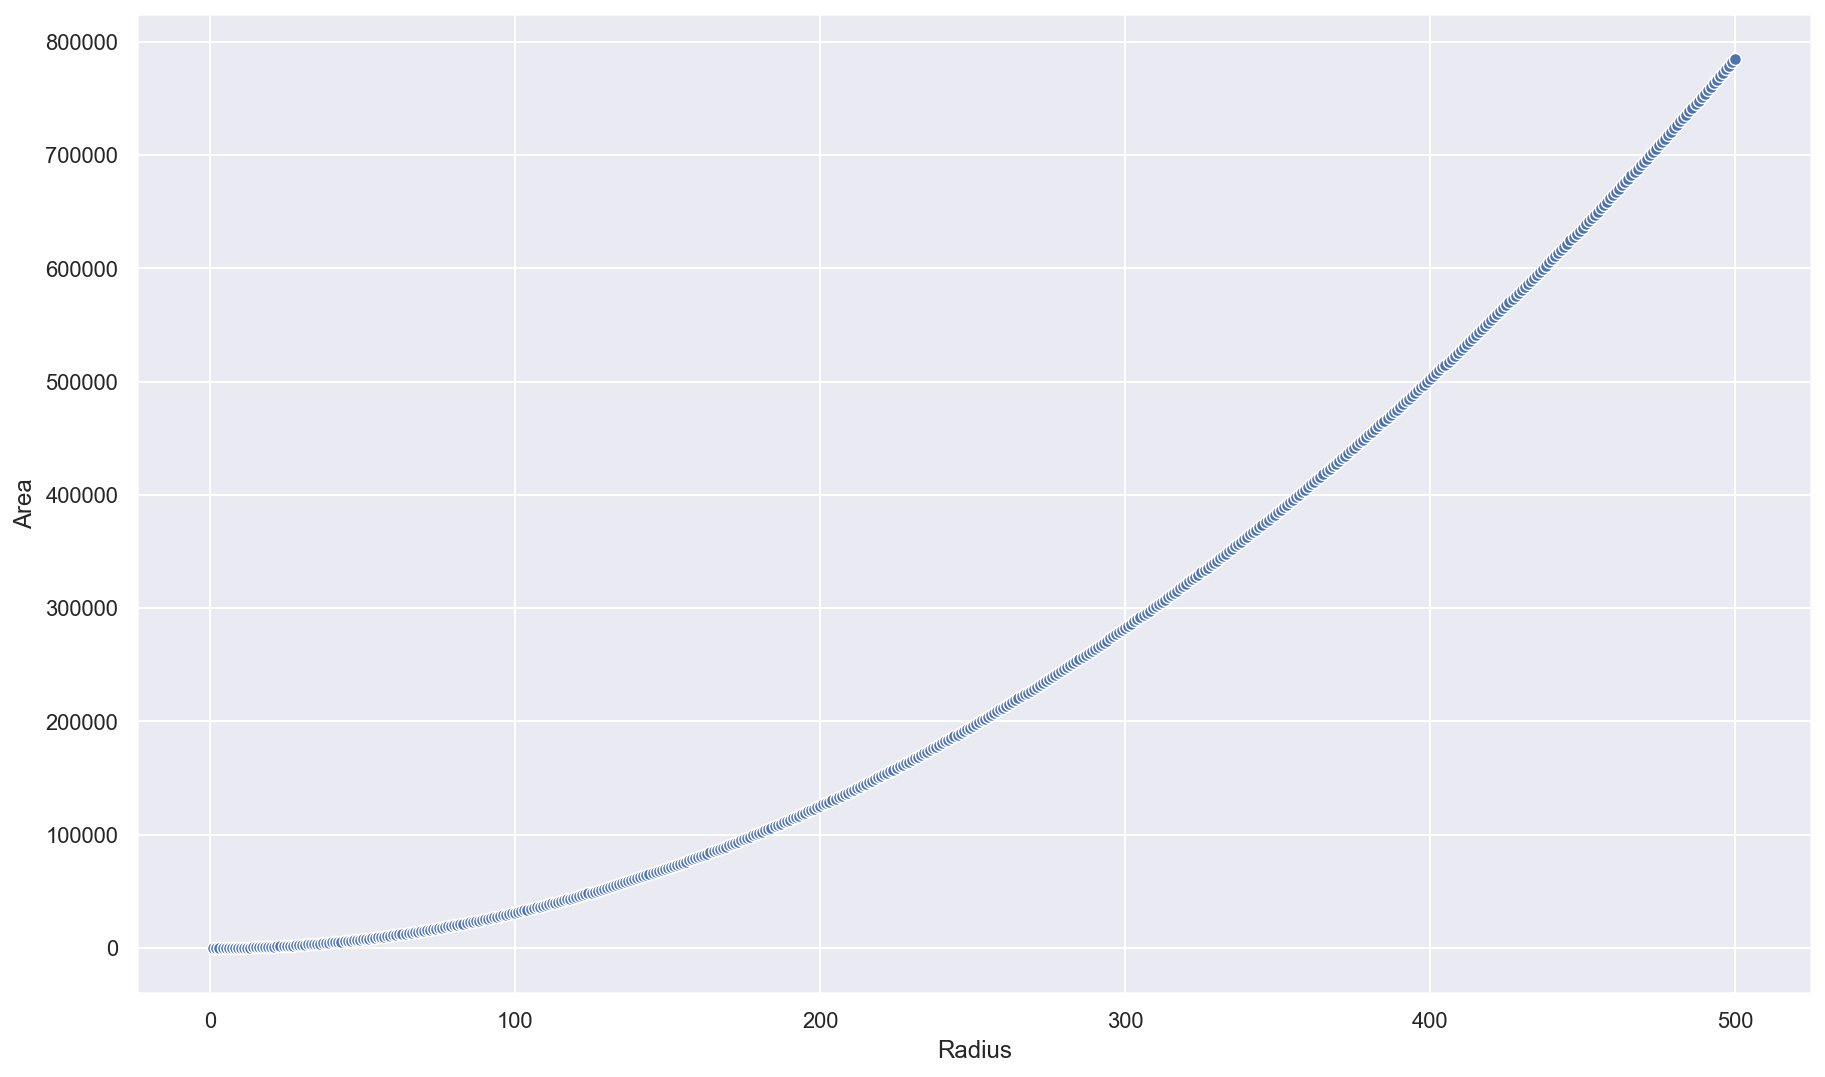

In [72]:
# Linearity check - graphical test
sns.scatterplot(x='Radius',y='Area',data=data_nonlinear)
plt.show()

In [74]:
# Linearity check - statistical test
# x-numerical,y-numerical ---> pearson correlation coefficient
data_nonlinear['Radius'].corr(data_nonlinear['Area'])

0.9683670100903378

In [ ]:
'''
CORRELATION DOESNOT NECESSARILY MEAN LINEAR RELATIONSHIP OR LINEAR INCREMENT OR DECREMENT
OF DEPENDENT VARIABLE W.R.T THE INDEPENDENT VARIABLE.

CORRELATION INDICATES THAT A DEPENDENT VARIABLE IS IMPACTED(THE IMPACT CAN BE LINEAR OR NON-LINEAR) BY AN 
INDEPENDENT VARIABLE AND IT CAN BE 
PREDICTED USING THAT INDEPENDENT VARIABLE.

pearson correlation coefficient tests whether the variables are linearly correlated or not.
'''

#### NORMALITY CHECK

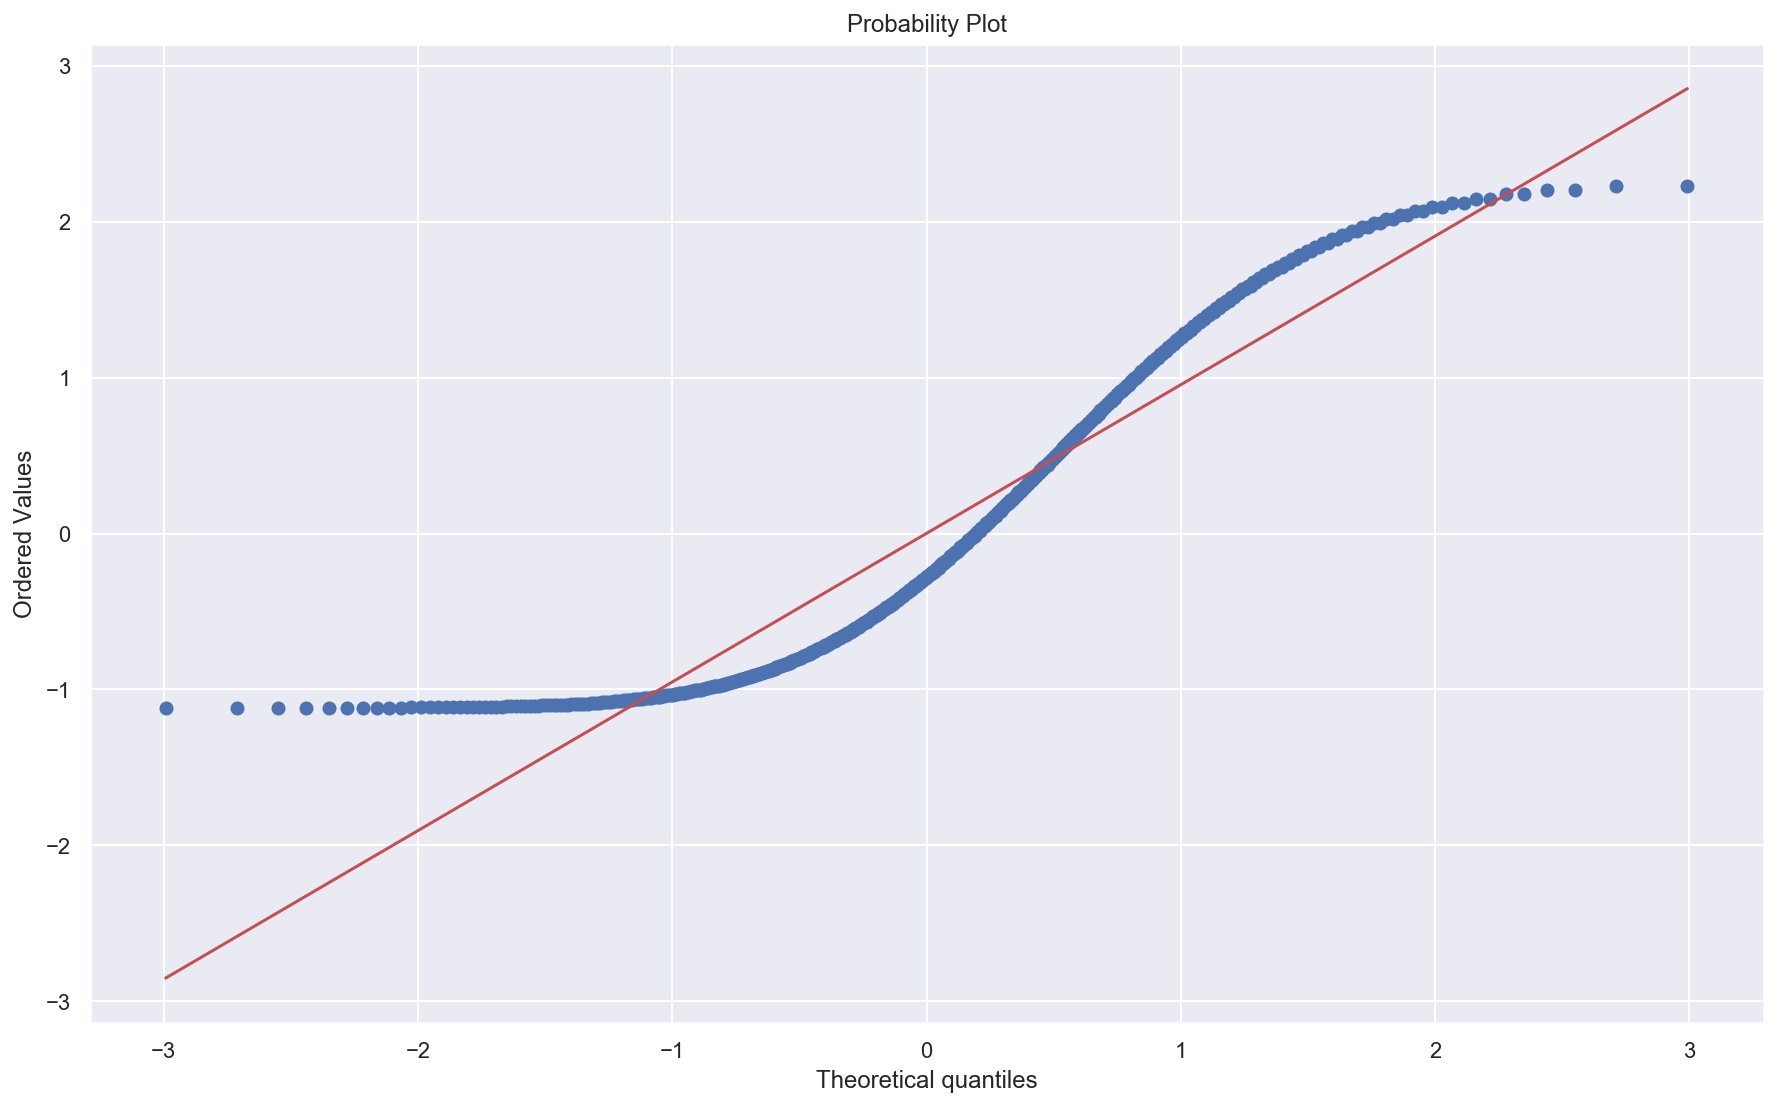

In [75]:
# Normality - graphical test no 1

import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

probplot(y) creates a normal probability plot comparing the distribution of the data in y to the normal distribution.

probplot plots each data point in y using marker symbols and draws a reference line that represents the theoretical distribution. 

0      130049.38
1      128485.66
2      126928.22
3      125377.06
4      123832.18
         ...    
495    123832.18
496    125377.06
497    126928.22
498    128485.66
499    130049.38
Length: 500, dtype: float64


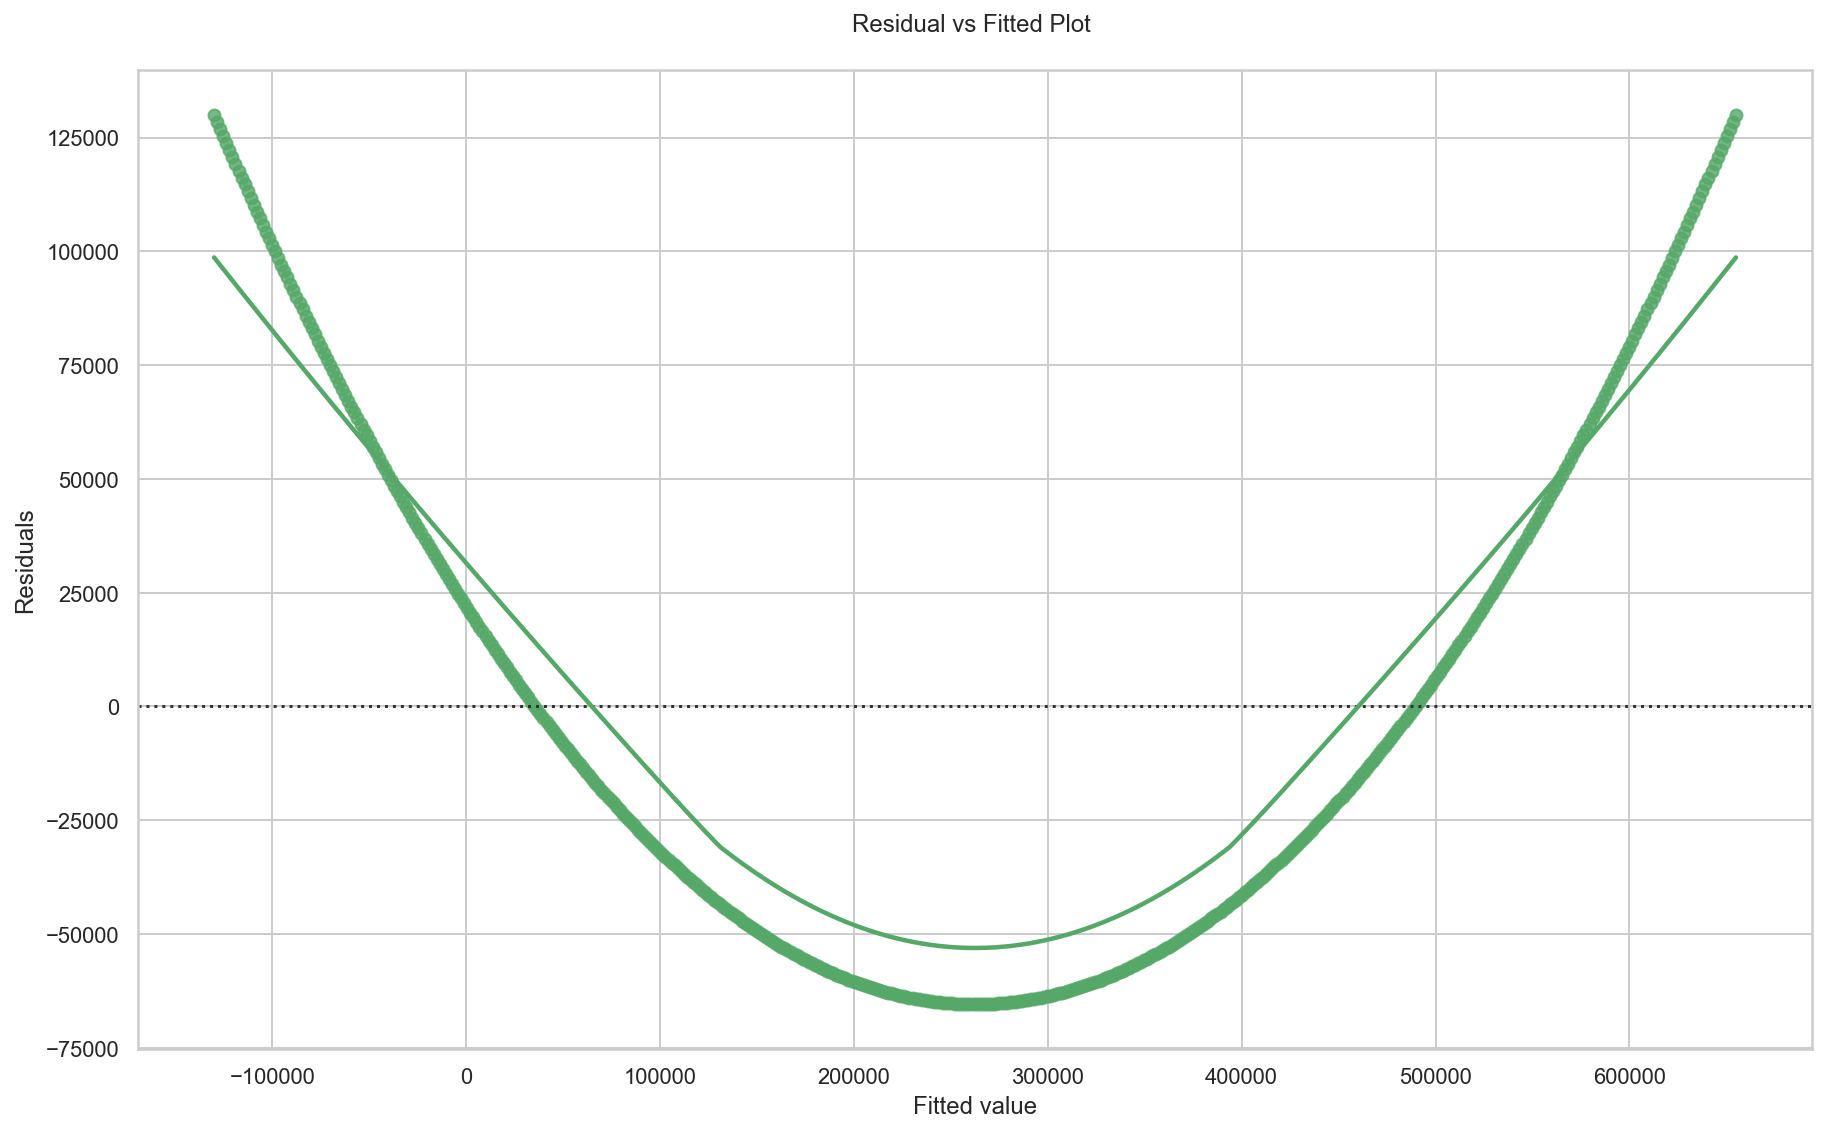

In [76]:
# normality - graphical test no 2

#residual plot
sns.set(style = 'whitegrid')

pred = lin_reg.predict(X_constant)
residuals = lin_reg.resid
print(residuals)



ax = sns.residplot(pred, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

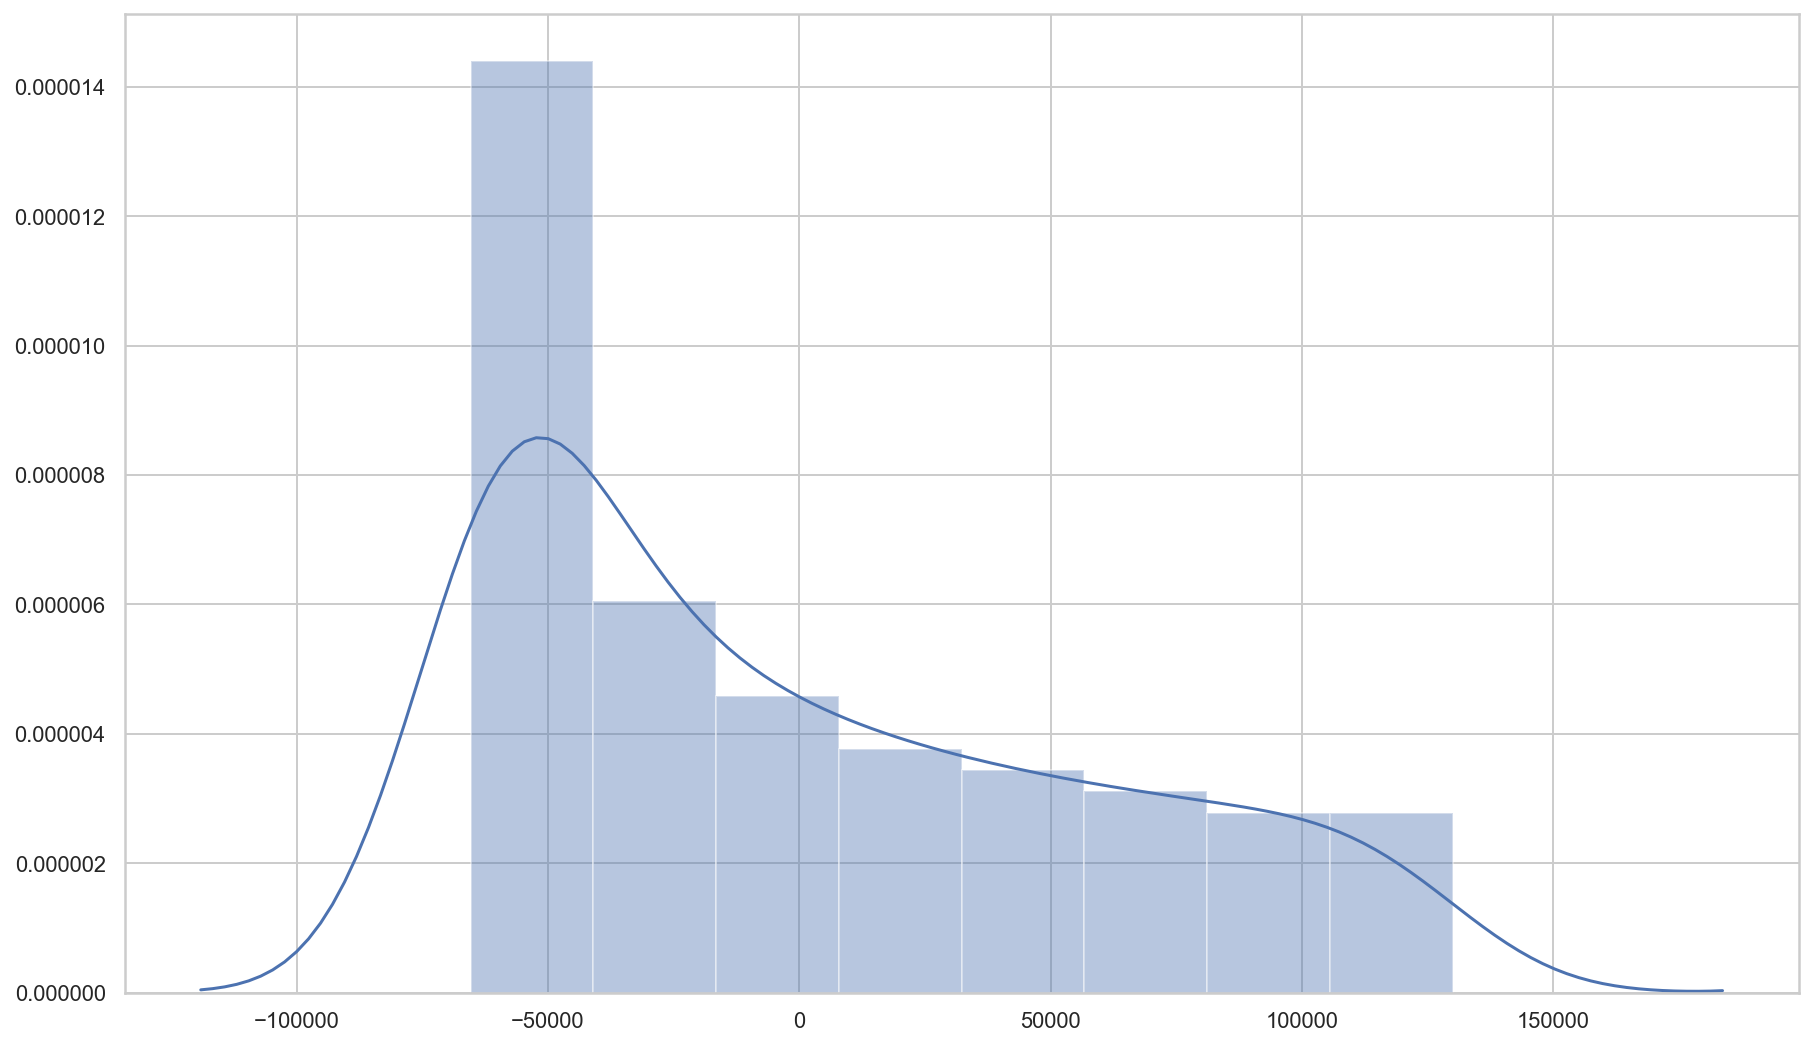

In [77]:
# normality - graphical test no 3
sns.distplot(lin_reg.resid)

In [78]:
# normality  - statistical test (jarque-bera)
print(stats.jarque_bera(lin_reg.resid))

(49.31972813115159, 1.951450112613884e-11)


NORMALITY CHECK RESULTS -

1. IF THE SAMPLE DATA HAS A NORMAL DISTRIBUTION, THEN THE DATA POINTS APPEAR ALONG THE REFERENCE LINE OF THE PROBPLOT. THE REFERENCE LINE CONNECTS THE FIRST AND THIRD QUARTILES OF THE DATA AND EXTENDS TO THE ENDS OF THE DATA. A DISTRIBUTION OTHER THAN NORMAL INTRODUCES CURVATURE IN THE DATA PLOT.


2. FROM THE RESIDUAL PLOT WE CAN OBSERVE A PATTERN IN THE RESIDUALS(GREEN CURVE),THE RESIDUALS ARE NOT SYMMETRICALLY DISTRIBUTED.


3. THE DENSITY PLOT OF RESIDUALS IS ALSO NOT NORMAL, THE DATA IS RIGHT SKEWED


4. THE LINEAR JARQUE BERA TEST, Ho AND Ha HERE IS:-


    Ho - RESIDUALS ARE NORMAL
   
    Ha - RESIDUALS ARE NOT NORMAL
   
   ALSO GAVE A VERY LOW P-VALUE, WE REJECT NULL HYPOTHESIS , THE RESIDUALS ARE NOT NORMAL
   
   THE CRITICAL CHI SQUARE VALUE AT THE 5% LEVEL OF SIGNIFICANCE IS 5.99. IF THE COMPUTED VALUE EXCEEDS THIS VALUE      THE NULL HYPOTHESIS IS REJECTED.

   IN THIS CASE THE COMPUTED VALUE OF THE JB STATISTIC 49.32 IS GREATER THAN 5.99. THUS WE REJECT THE NULL HYPOTHESIS    THAT THE ERROR TERMS ARE NORMALLY DISTRIBUTED.



#### HOMOSCADASTICITY CHECK


HOMOSCEDACITY : IF THE VARIANCE OF THE RESIDUALS ARE SYMMETRICALLY DISTRIBUTED ACROSS THE REGRESSION LINE , THEN THE DATA IS SAID TO HOMOSCEDASTIC.

HETEROSCEDACITY : IF THE VARIANCE IS UNEQUAL FOR THE RESIDUALS ACROSS THE REGRESSION LINE, THEN THE DATA IS SAID TO BE HETEROSCEDASTIC. IN THIS CASE THE RESIDUALS CAN FORM AN ARROW SHAPE OR ANY OTHER NON SYMMETRICAL SHAPE.


THIS TEST IS BASED ON THE HYTPOTHESIS TESTING WHERE NULL AND ALTERNATE HYPOTHESIS ARE:

$$ H_{0} : \sigma_{u_{i}}~IS~CONSTANT~ACROSS~THE~RANGE~OF~DATA $$

$$ H_{A} : \sigma_{u_{i}}~IS~NOT~CONSTANT~ACROSS~THE~RANGE~OF~DATA $$

THE RESIDUALS SHOULD NOT BE HOMOSCEDASTIC.

[Text(0, 0.5, 'sqrt(abs(Residuals))'), Text(0.5, 0, 'Fitted Values')]

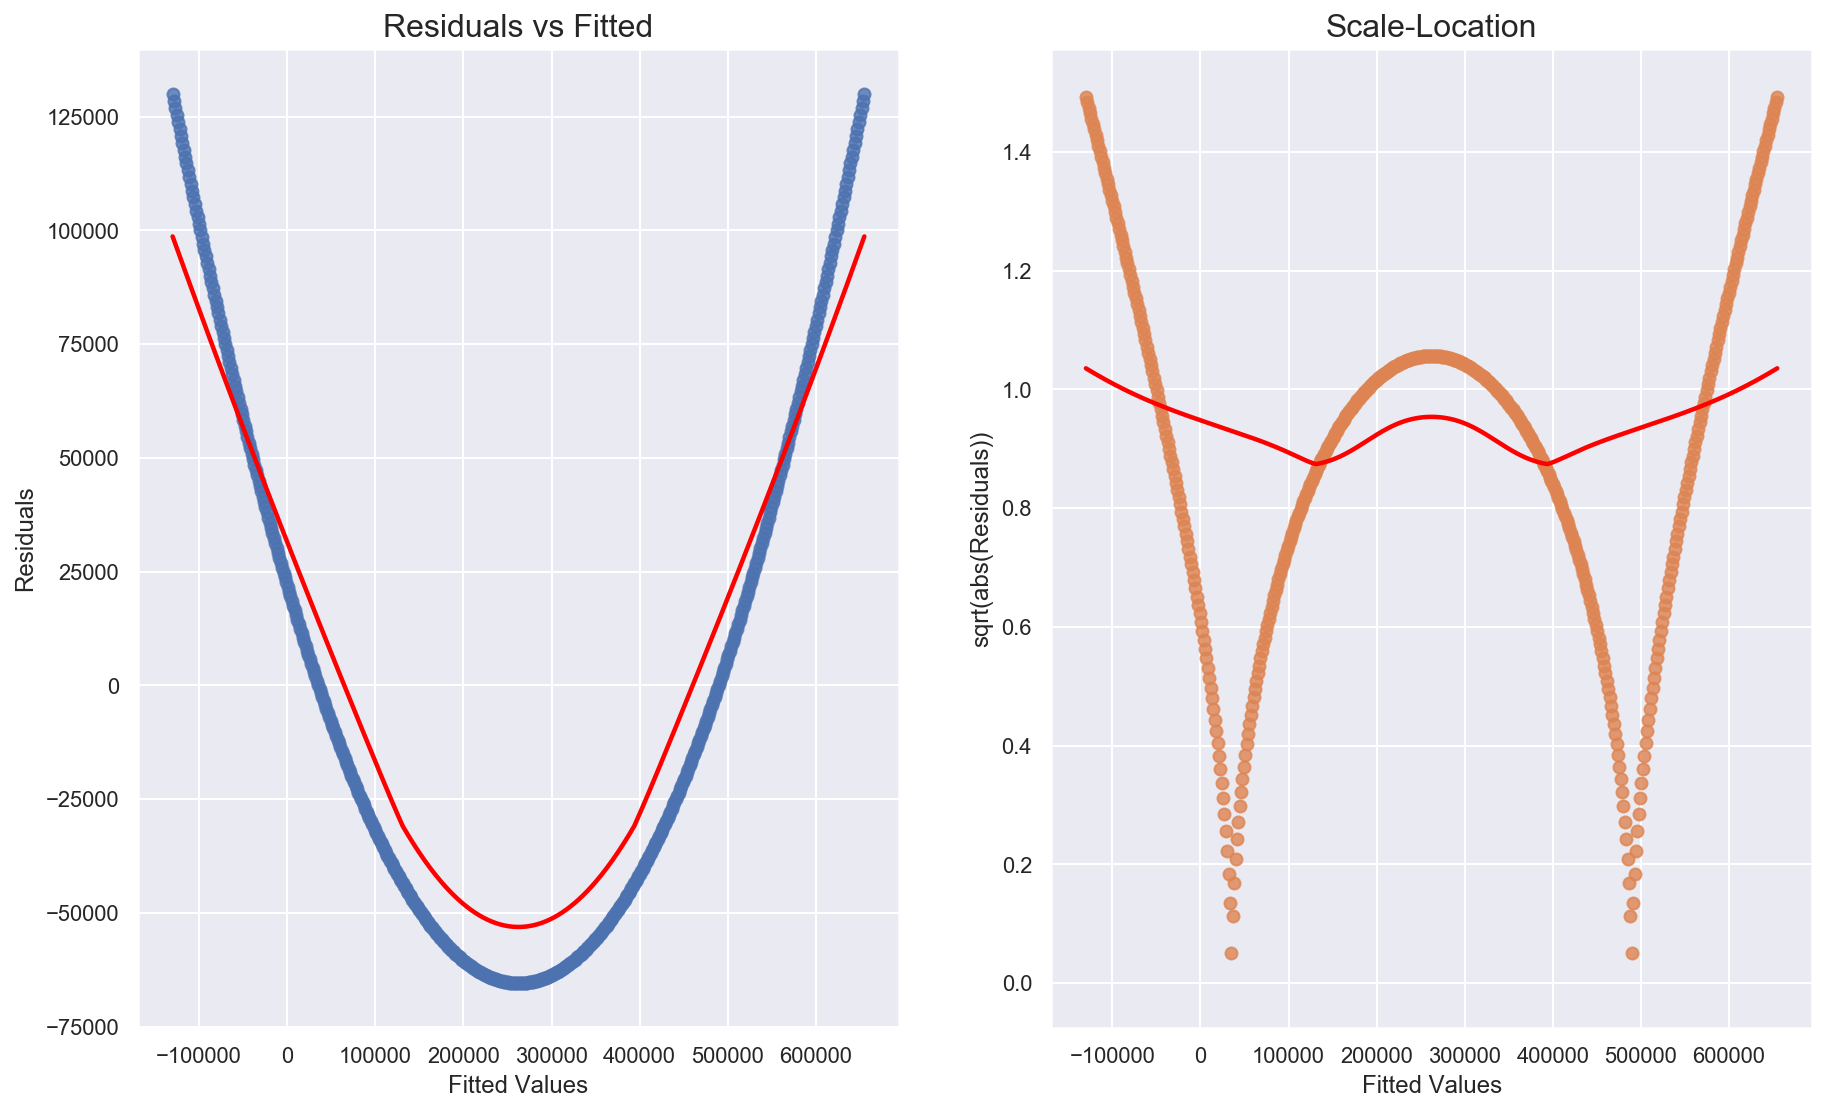

In [79]:
# Graphical test
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

In [80]:
# statistical test - goldfeld quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 1.0), ('p-value', 0.49999999999995254)]

In [81]:
lin_reg.resid.var()

3430264281.560003

HOMOSCADISTICITY RESULTS -

1. THE VARIANCE OF THE RESIDUALS IS CONSTANT ACROSS THE RANGE OF DATA.


2. THE GOLDFELD TEST GAVE A VERY HIGH P-VALUE, THEREFORE WE FAILED TO REJECT THE NULL HYPOTHESIS IN THE FAVOUR OF 
   HOMOSCADASTICITY.
   
   THE DATA IS HOMOSCADASTIC


In [86]:
lin_model.coef_

array([[1573.14]])

In [119]:
lin_model.intercept_

array([-131619.38])

#### how is internal process workin - stats model,ml model

In [234]:
li = range(1,501)

In [235]:
se = pd.Series(li)

In [236]:
se = se.values.reshape(500,1)

In [237]:
#ML MODEL
y_pred  =  lin_model.predict(se)

In [238]:
l1 = []

for i in range(1,501):
    l1.append(3.14*i*i)

In [239]:
ser = pd.Series(l1)

In [240]:
actual = ser.values.reshape(500,1)

In [241]:
y_pred

array([[-1.3004624e+05],
       [-1.2847310e+05],
       [-1.2689996e+05],
       [-1.2532682e+05],
       [-1.2375368e+05],
       [-1.2218054e+05],
       [-1.2060740e+05],
       [-1.1903426e+05],
       [-1.1746112e+05],
       [-1.1588798e+05],
       [-1.1431484e+05],
       [-1.1274170e+05],
       [-1.1116856e+05],
       [-1.0959542e+05],
       [-1.0802228e+05],
       [-1.0644914e+05],
       [-1.0487600e+05],
       [-1.0330286e+05],
       [-1.0172972e+05],
       [-1.0015658e+05],
       [-9.8583440e+04],
       [-9.7010300e+04],
       [-9.5437160e+04],
       [-9.3864020e+04],
       [-9.2290880e+04],
       [-9.0717740e+04],
       [-8.9144600e+04],
       [-8.7571460e+04],
       [-8.5998320e+04],
       [-8.4425180e+04],
       [-8.2852040e+04],
       [-8.1278900e+04],
       [-7.9705760e+04],
       [-7.8132620e+04],
       [-7.6559480e+04],
       [-7.4986340e+04],
       [-7.3413200e+04],
       [-7.1840060e+04],
       [-7.0266920e+04],
       [-6.8693780e+04],


In [242]:
residuals = actual-y_pred

In [243]:
residuals

array([[130049.38],
       [128485.66],
       [126928.22],
       [125377.06],
       [123832.18],
       [122293.58],
       [120761.26],
       [119235.22],
       [117715.46],
       [116201.98],
       [114694.78],
       [113193.86],
       [111699.22],
       [110210.86],
       [108728.78],
       [107252.98],
       [105783.46],
       [104320.22],
       [102863.26],
       [101412.58],
       [ 99968.18],
       [ 98530.06],
       [ 97098.22],
       [ 95672.66],
       [ 94253.38],
       [ 92840.38],
       [ 91433.66],
       [ 90033.22],
       [ 88639.06],
       [ 87251.18],
       [ 85869.58],
       [ 84494.26],
       [ 83125.22],
       [ 81762.46],
       [ 80405.98],
       [ 79055.78],
       [ 77711.86],
       [ 76374.22],
       [ 75042.86],
       [ 73717.78],
       [ 72398.98],
       [ 71086.46],
       [ 69780.22],
       [ 68480.26],
       [ 67186.58],
       [ 65899.18],
       [ 64618.06],
       [ 63343.22],
       [ 62074.66],
       [ 60812.38],


In [244]:
y_pred1=y_pred.reshape(500,)

In [245]:
res_series = pd.Series(residuals.reshape(500,))

In [246]:
li = range(1,501)
series = pd.Series(li)

In [247]:
# STATS MODEL
X_constant1 = sm.add_constant(series)
predictions = lin_reg.predict(X_constant1)

In [248]:
predictions.shape,y_pred1.shape

((500,), (500,))

In [249]:
X_constant1.rename({0:'Radius'},axis=1,inplace=True)

In [250]:
X_constant1['predictions']=predictions

In [251]:
X_constant1['actual']=ser

In [252]:
X_constant1['resids']=X_constant1['actual']-X_constant1['predictions']

In [253]:
X_constant1['resids'].shape,res_series.shape

((500,), (500,))

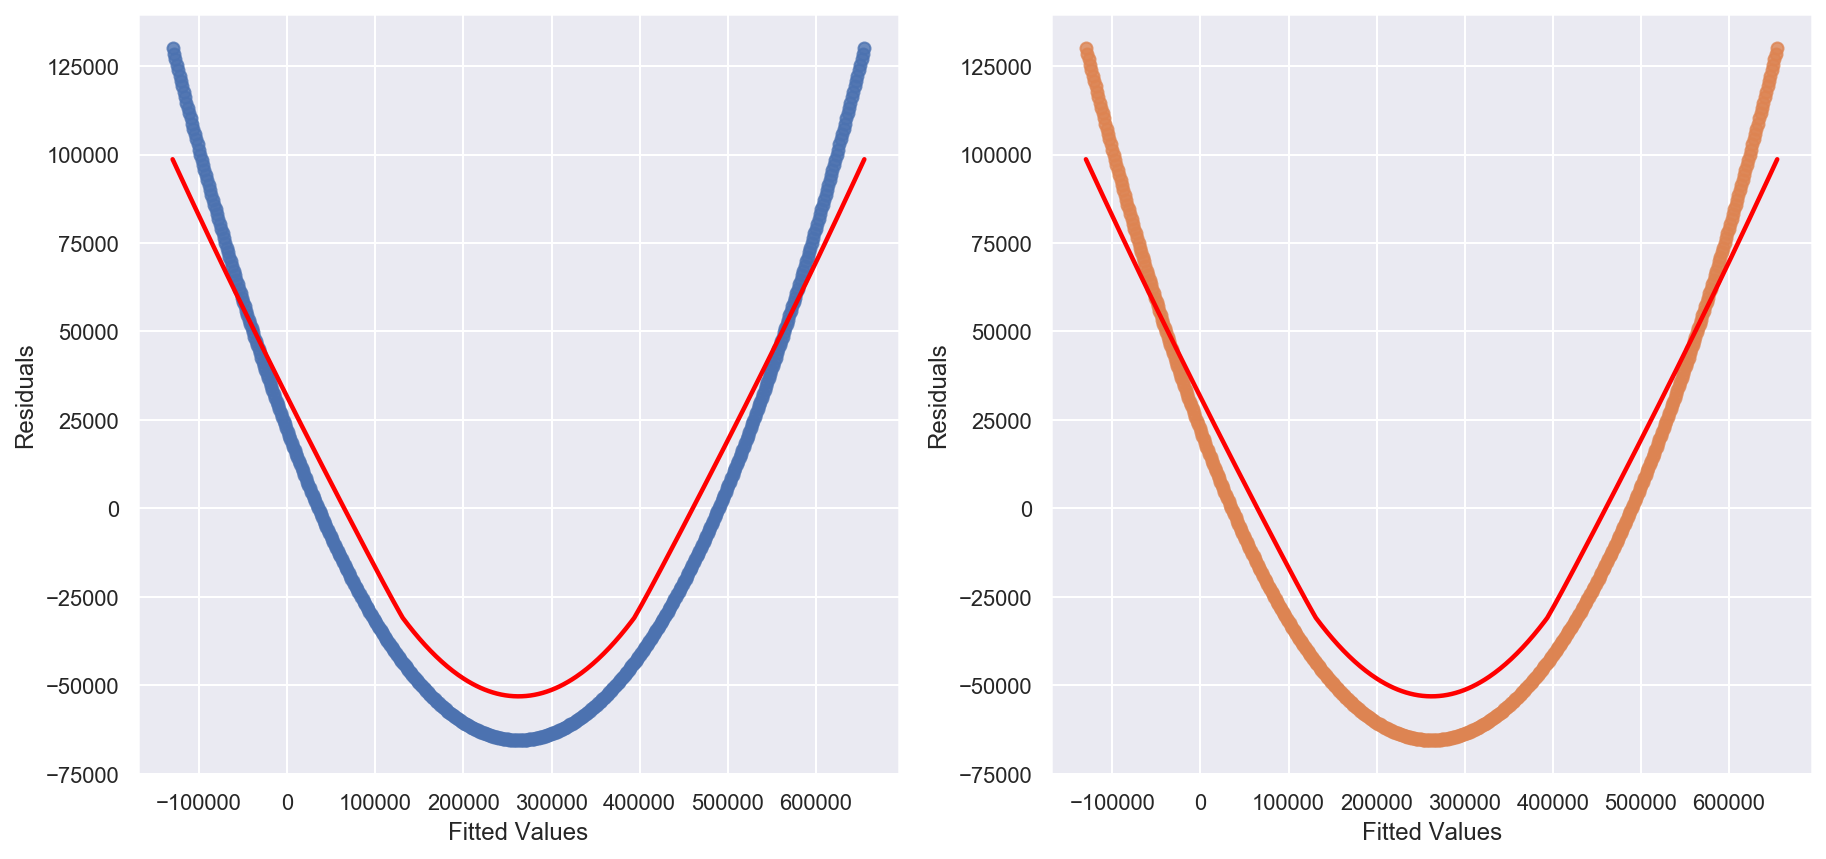

In [254]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
sns.regplot(x=y_pred1, y=res_series, lowess=True,ax=axes[0] ,line_kws={'color': 'red'})
axes[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=predictions, y=X_constant1['resids'], lowess=True,ax=axes[1] ,line_kws={'color': 'red'})
axes[1].set(xlabel='Fitted Values', ylabel='Residuals')
plt.show()

In [ ]:
'''
IF THE VARIANCE OF THE RESIDUALS ARE SYMMETRICALLY DISTRIBUTED ACROSS THE REGRESSION LINE ,
THEN THE DATA IS SAID TO HOMOSCEDASTIC.

In case of simple linear regression, we always consider a single independent variable for predicting the 
dependent variable. In short, this is nothing but an equation of straight line. 
Hence , a simple linear regression line is always straight in order to satisfy the above condition.

FIRSTLY, HERE THERE IS NO REGRESSION LINE,FOR THE RESIDUALS TO BE SYMMETRIC ACROSS A LINE,WE HAVE A PARABOLA HERE,SO
IF THE LINEARITY CONDITION IS NOT SATISFIED,WE DON'T HAVE TO CHECK THIS CONDITION, BECAUSE THIS HAS TO BE CHECKED 
ACROSS REGRESSION LINE, WE CAN CHECK THIS AFTER APPLYING
TRANSFORMATIONS.

THE DATA IS ANYWAY NOT HOMOSCADASTIC.
BUT THE TEST SAYS THE DATA IS HOMOSCADASTIC.

UNDERSTAND HOMOSCADASTICITY AND HETEROSCEDASTICITY WITH EXAMPLES AS A PART OF INTERVIEW QUESTIONS.
'''

In [255]:
X_constant1['resids'].var()

3430264281.560003

In [256]:
res_series.var()

3430264281.5600033

In [ ]:
'''
THERE WILL BE NO MULTI COLLINEARITY AS THERE IS ONLY ONE INDEPENDENT VARIABLE
'''

### MULTIPLE LINEAR REGRESSION - LINEARITY CHECK

#### LINEAR DATA

In [259]:
mydict = {}

In [262]:
age_list = np.random.randint(23,55,size=(500,))

In [269]:
data_linear = pd.DataFrame(columns=['Age'],data=sorted(age_list))

In [272]:
data_linear.drop_duplicates(inplace=True)

In [277]:
dataframe_linear = pd.DataFrame()

In [278]:
dataframe_linear['Age'] = data_linear['Age'].values

In [281]:
dataframe_linear.shape

(32, 1)

In [284]:
dataframe_linear['Experience'] = range(2,34)

In [285]:
dataframe_linear.head()

,Age,Experience
0,23,2
1,24,3
2,25,4
3,26,5
4,27,6


In [288]:
dataframe_linear['Salary'] = range(20000,180000,5000)

In [289]:
dataframe_linear.head()

,Age,Experience,Salary
0,23,2,20000
1,24,3,25000
2,25,4,30000
3,26,5,35000
4,27,6,40000


In [290]:
dataframe_linear.shape

(32, 3)

#### LINEARITY CHECK

In [291]:
X = dataframe_linear.drop('Salary',axis=1)
y = dataframe_linear['Salary']

In [292]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
predictions = lin_reg.predict(X_constant)
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.976e+31
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:02:11   Log-Likelihood:                 720.66
No. Observations:                  32   AIC:                            -1437.
Df Residuals:                      30   BIC:                            -1434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -191.8736   1.06e-13  -1.82e+15      0.000    -191.874    -191.874
Age          485.3273   7.42e-13   6.54e+14      0.000     485.327     485.327
Experience  4514.6727   1.49e-12   3.03e+15      0.000    4514.673    4514.673
==============================================================================
Omnibus:                        8.916   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                6.529
Skew:                           0.973   Prob(JB):                       0.0382
Kurtosis:                       1.947   Cond. No.                     1.19e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.4e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

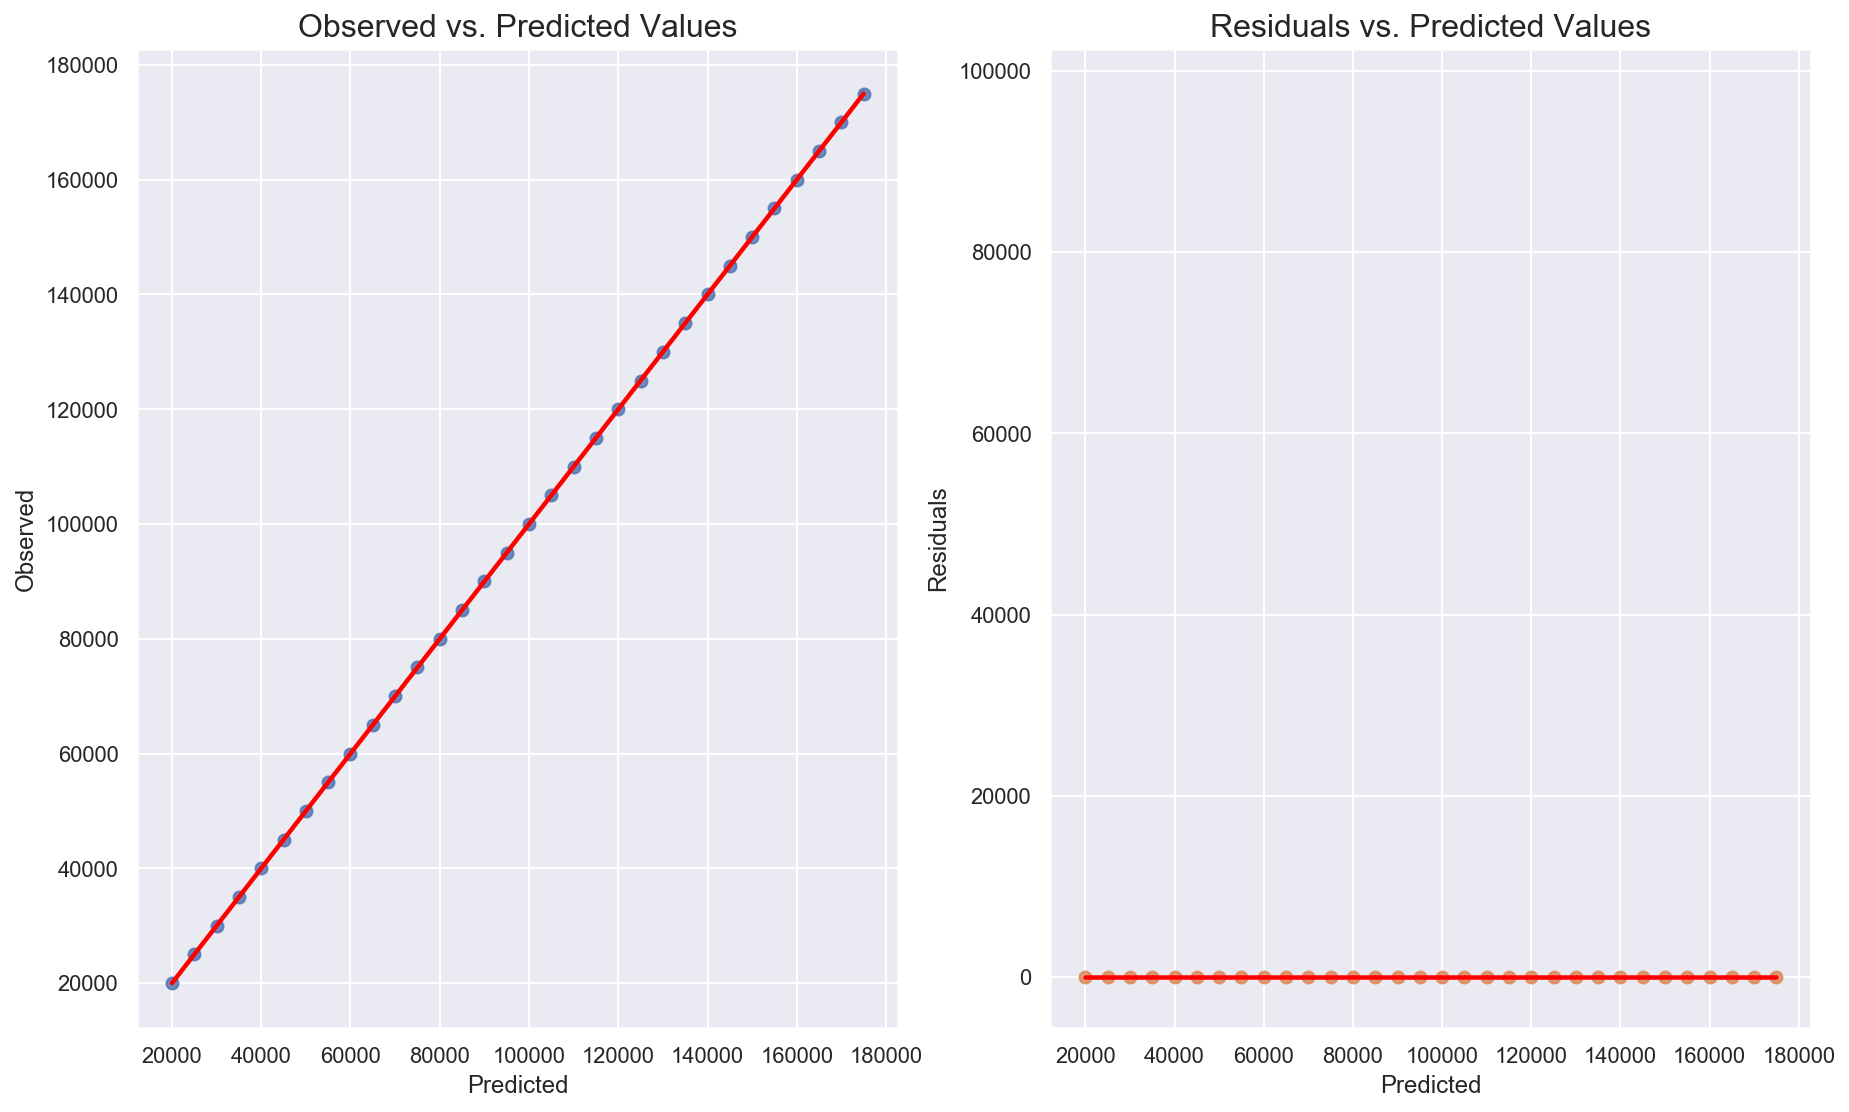

In [293]:
# linearity assumption - graphical test

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)

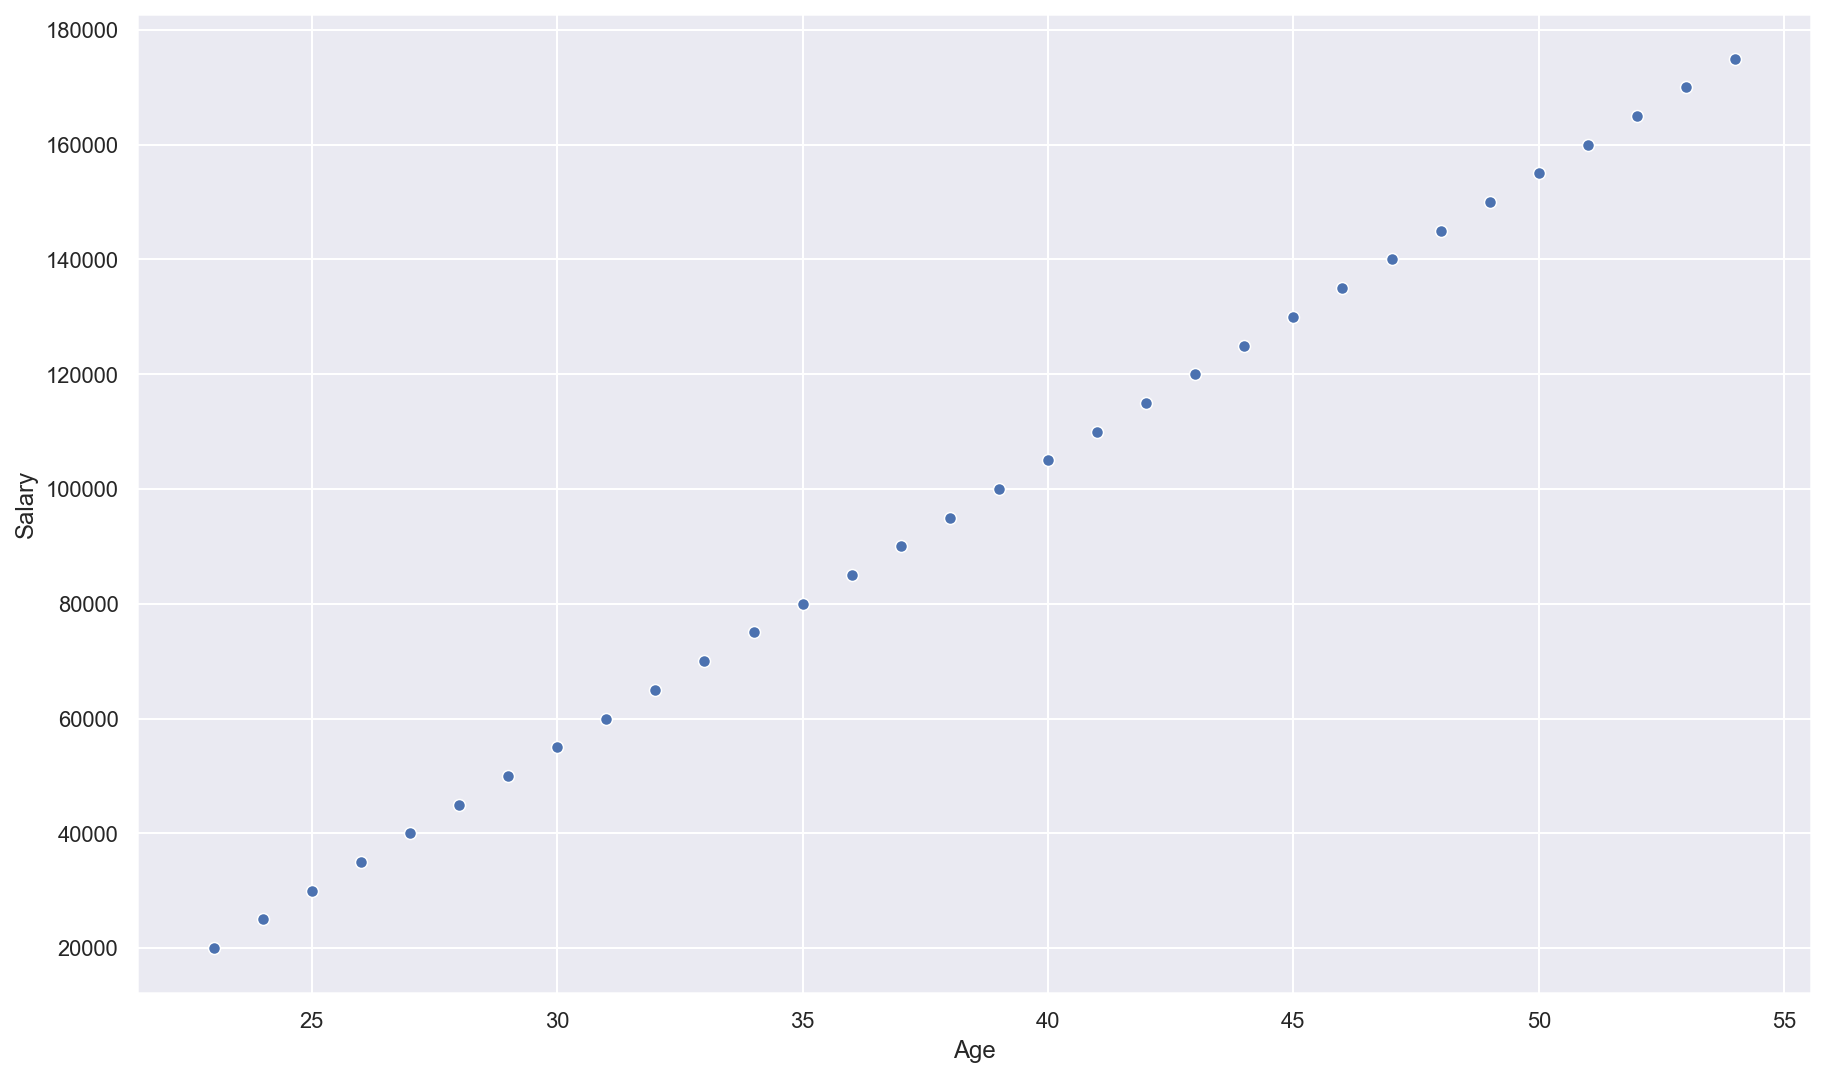

In [295]:
# Linearity check - graphical test
sns.scatterplot(x='Age',y='Salary',data=dataframe_linear)
plt.show()

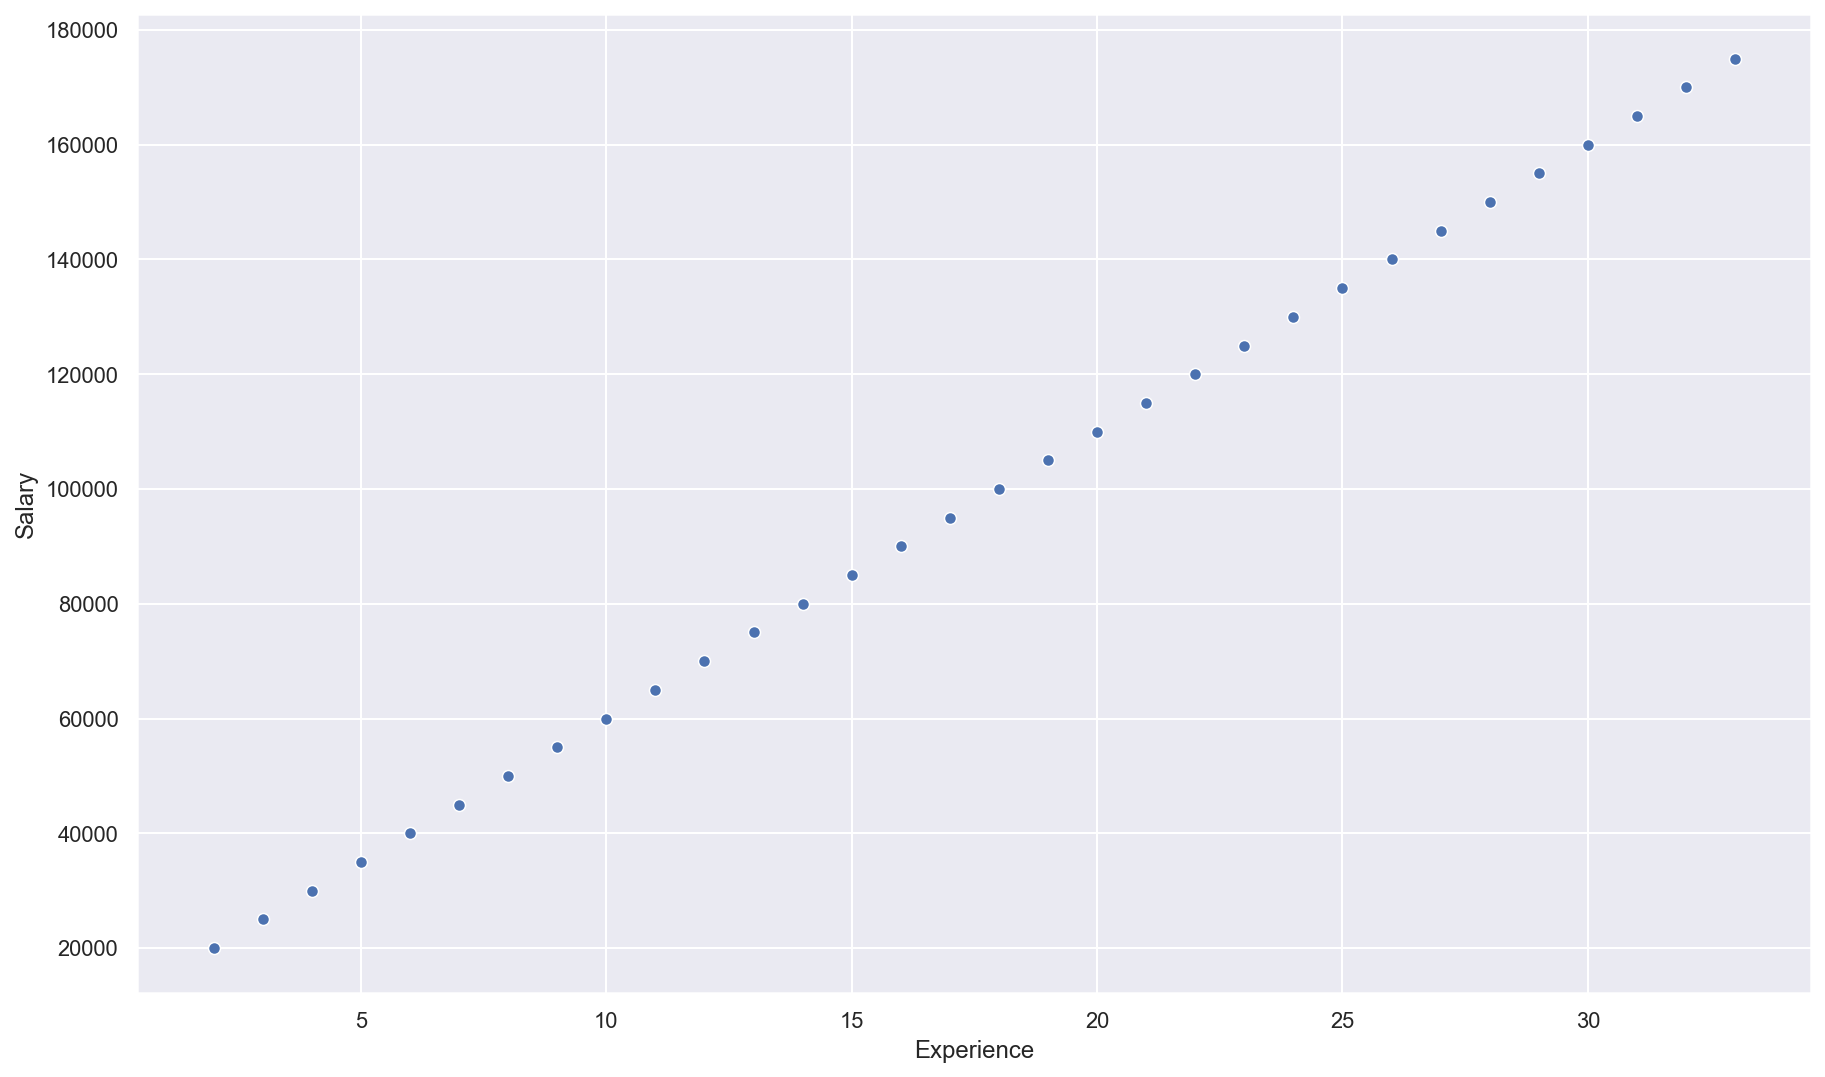

In [296]:
# Linearity check - graphical test
sns.scatterplot(x='Experience',y='Salary',data=dataframe_linear)
plt.show()

In [294]:
# statistical test
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(5.3786764705882355, 0.0014539935912667946)

#### NORMALITY CHECK

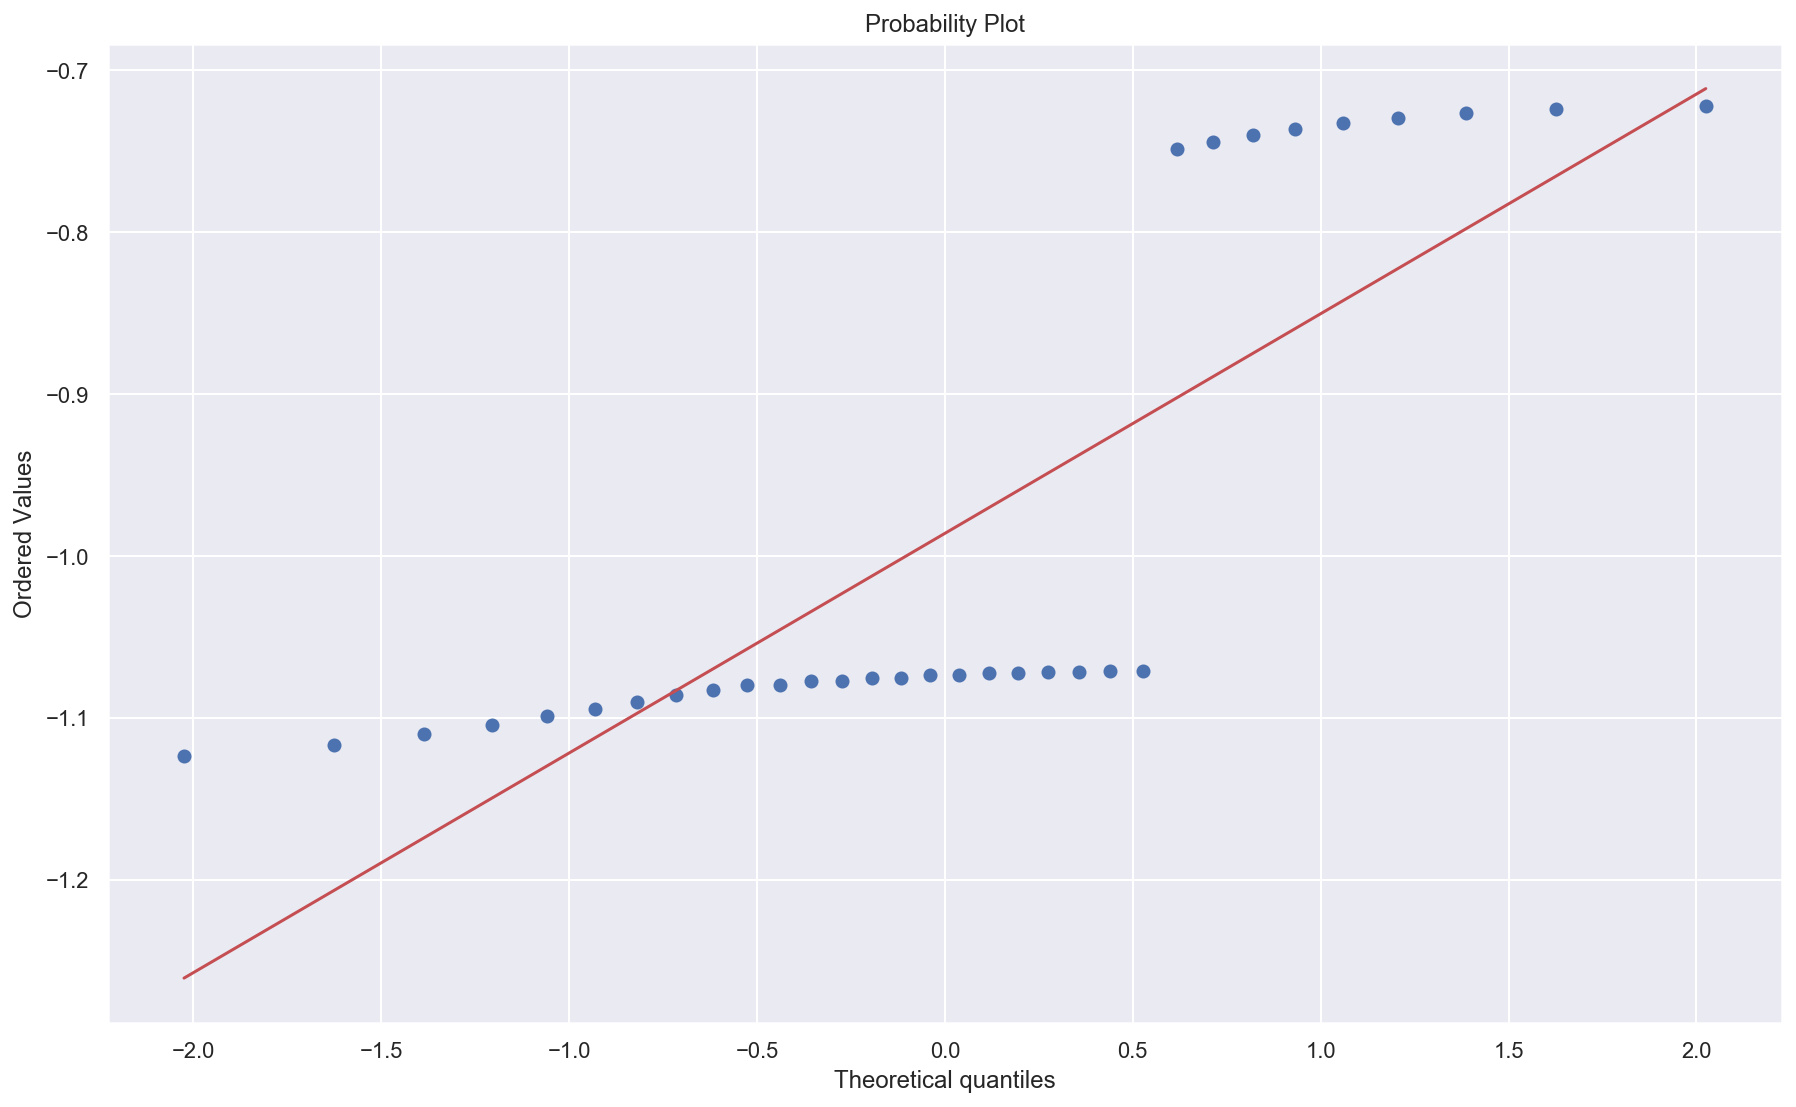

In [297]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

0    -4.365575e-11
1    -4.365575e-11
2    -4.365575e-11
3    -4.365575e-11
4    -4.365575e-11
5    -4.365575e-11
6    -4.365575e-11
7    -4.365575e-11
8    -4.365575e-11
9    -4.365575e-11
10   -4.365575e-11
11   -4.365575e-11
12   -4.365575e-11
13   -4.365575e-11
14   -4.365575e-11
15   -4.365575e-11
16   -4.365575e-11
17   -4.365575e-11
18   -4.365575e-11
19   -4.365575e-11
20   -4.365575e-11
21   -4.365575e-11
22   -4.365575e-11
23   -2.910383e-11
24   -2.910383e-11
25   -2.910383e-11
26   -2.910383e-11
27   -2.910383e-11
28   -2.910383e-11
29   -2.910383e-11
30   -2.910383e-11
31   -2.910383e-11
dtype: float64


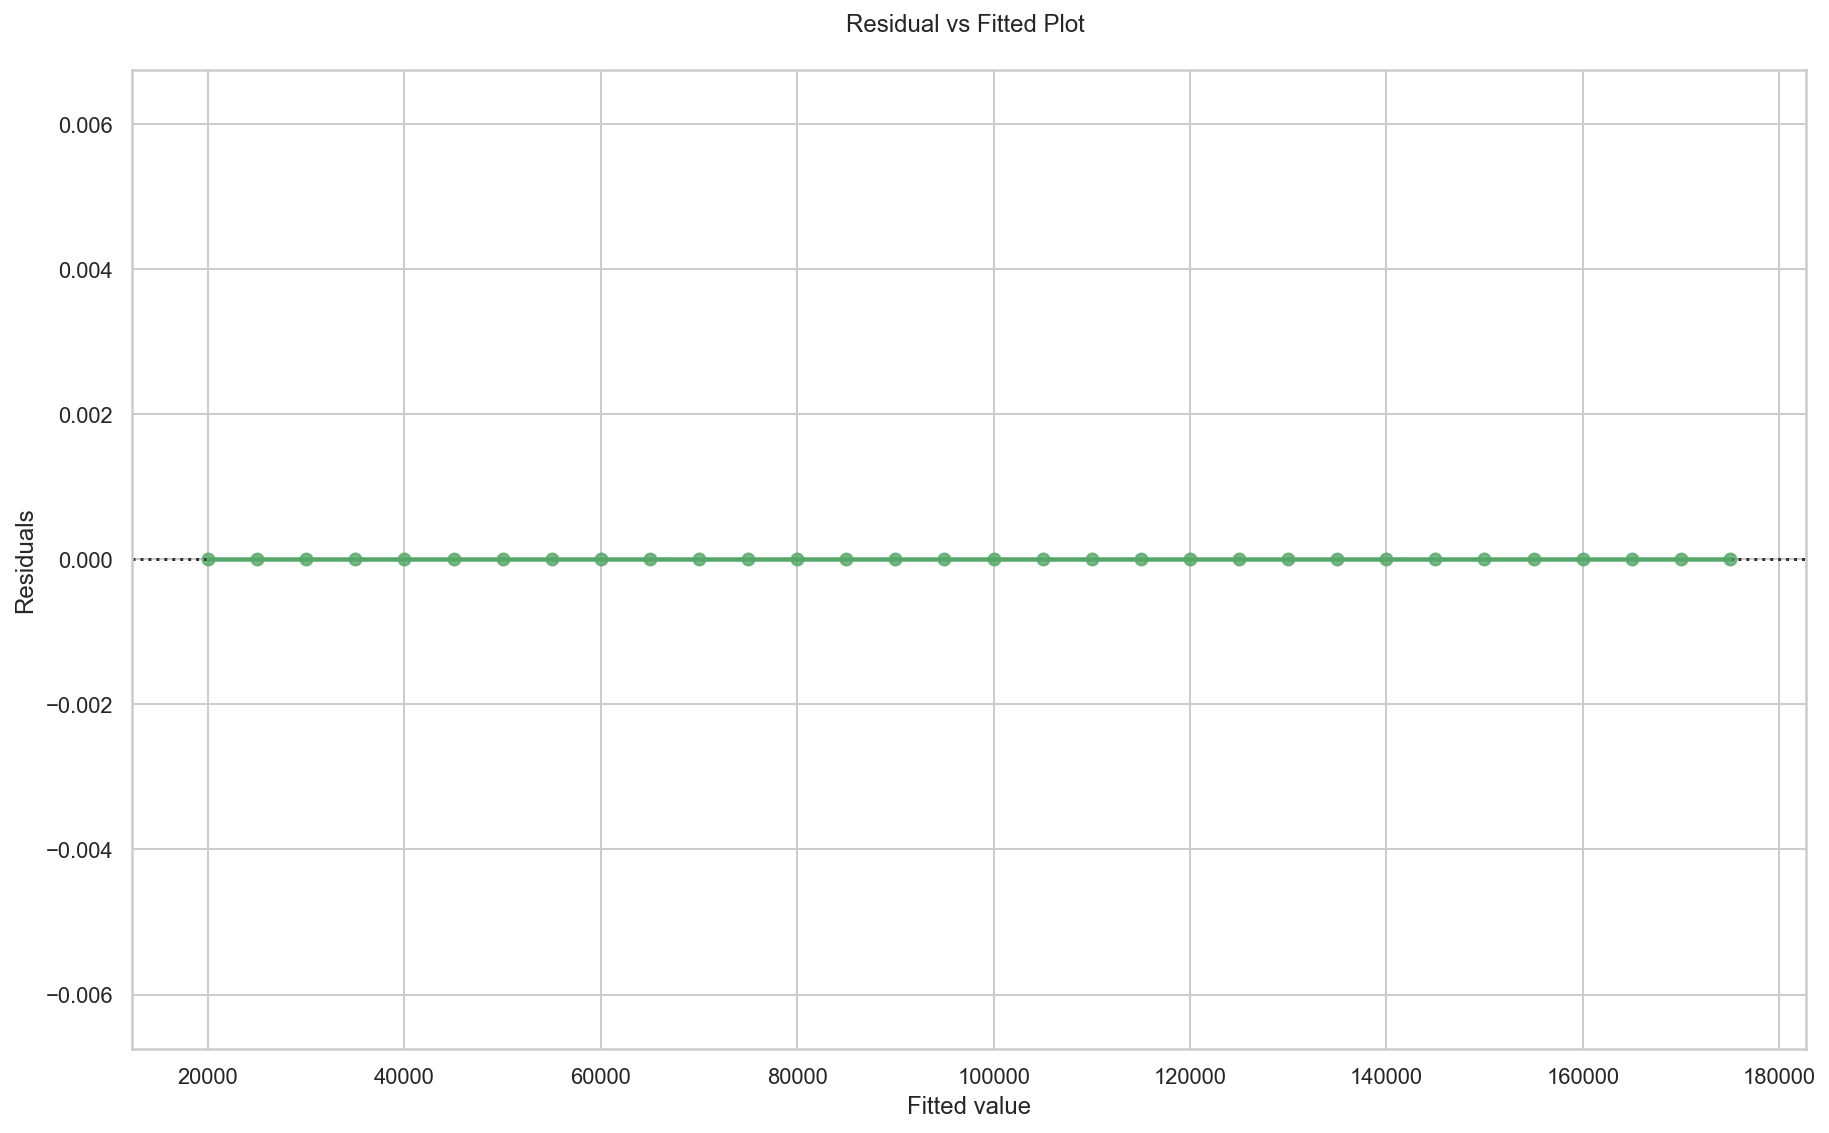

In [298]:
# normality - graphical test no 2

#residual plot
sns.set(style = 'whitegrid')

pred = lin_reg.predict(X_constant)
residuals = lin_reg.resid
print(residuals)



ax = sns.residplot(pred, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

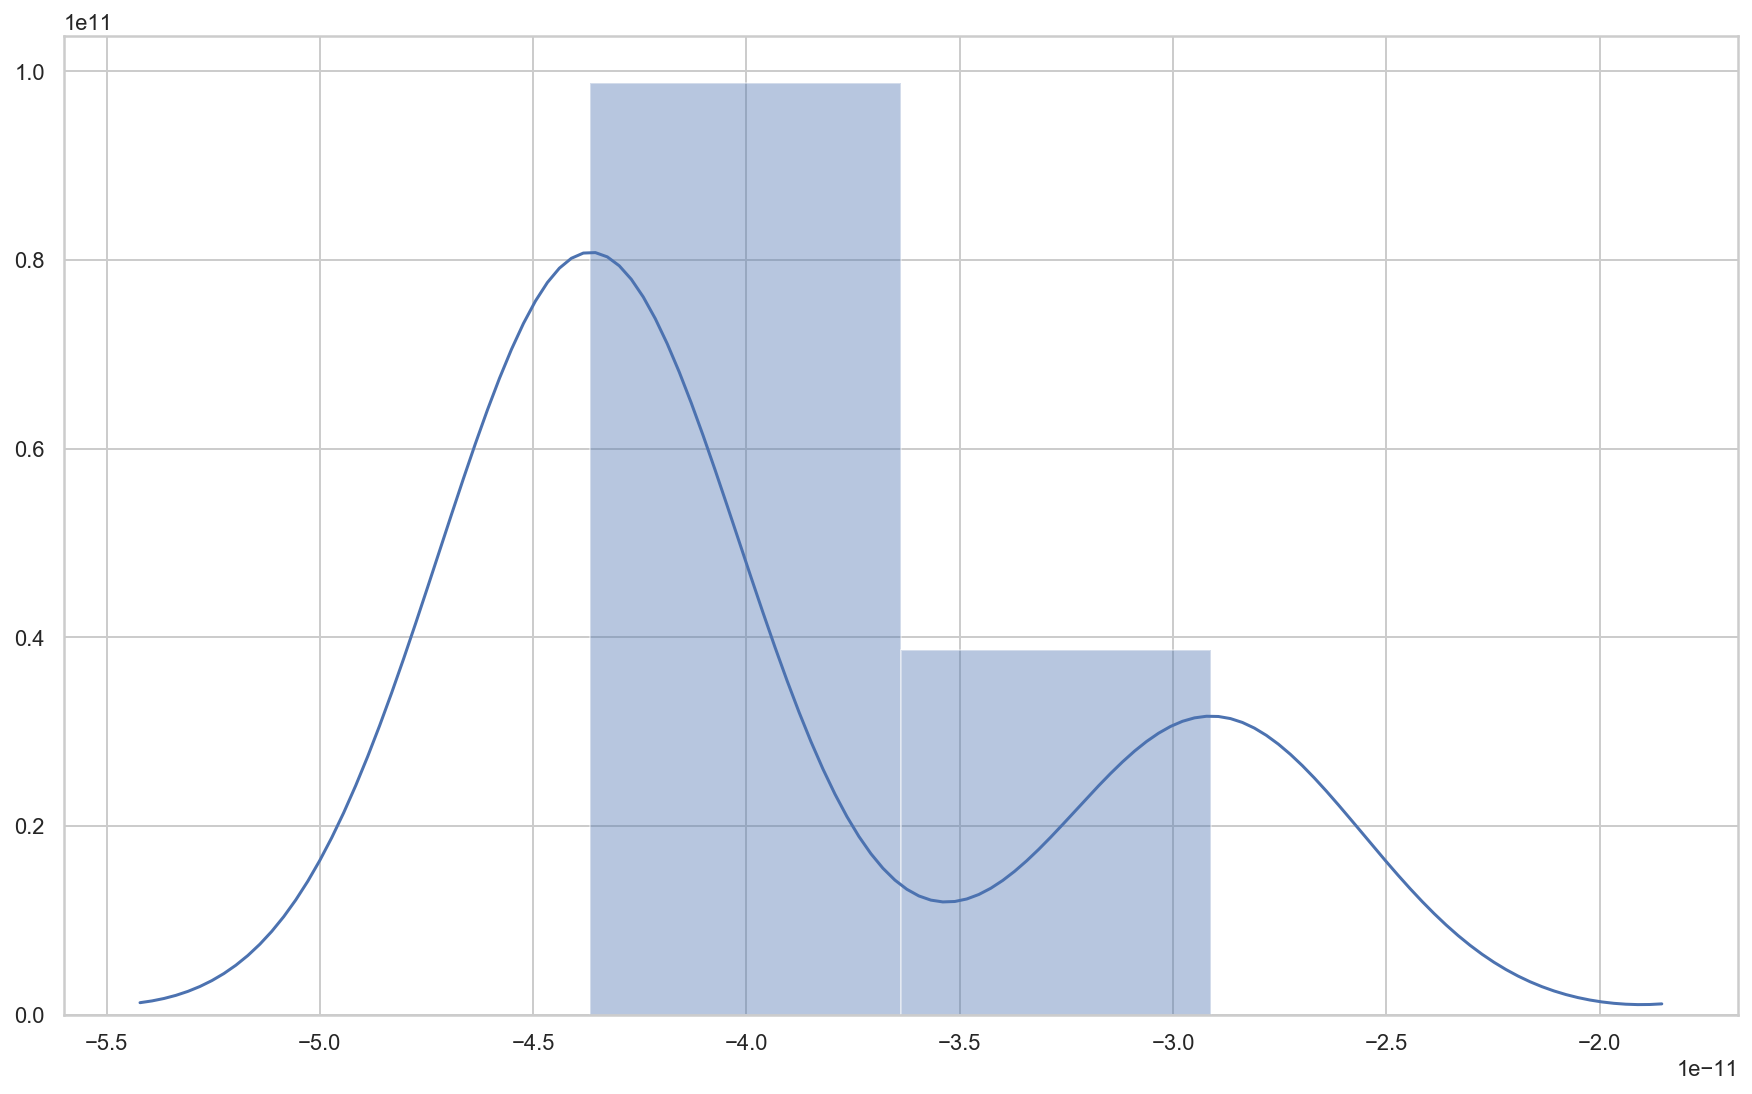

In [299]:
# normality - graphical test no 3
sns.distplot(lin_reg.resid)

In [300]:
# normality  - statistical test (jarque-bera)
print(stats.jarque_bera(lin_reg.resid))

(6.528724902175858, 0.0382212952626646)


In [ ]:
'''
THE DATA IS NOT ABSOLUTELY LINEAR OR NORMAL, IT IS VERY CLOSE TO BEING LINEAR AND NORMAL.

AFTER APPLYING THE RELEVANT TRANSFORMATIONS , WE CAN FIT A LINEAR REGRESSION MODEL TO THIS DATA.
'''

#### HOMOSCEDASTICITY CHECK

[Text(0, 0.5, 'sqrt(abs(Residuals))'), Text(0.5, 0, 'Fitted Values')]

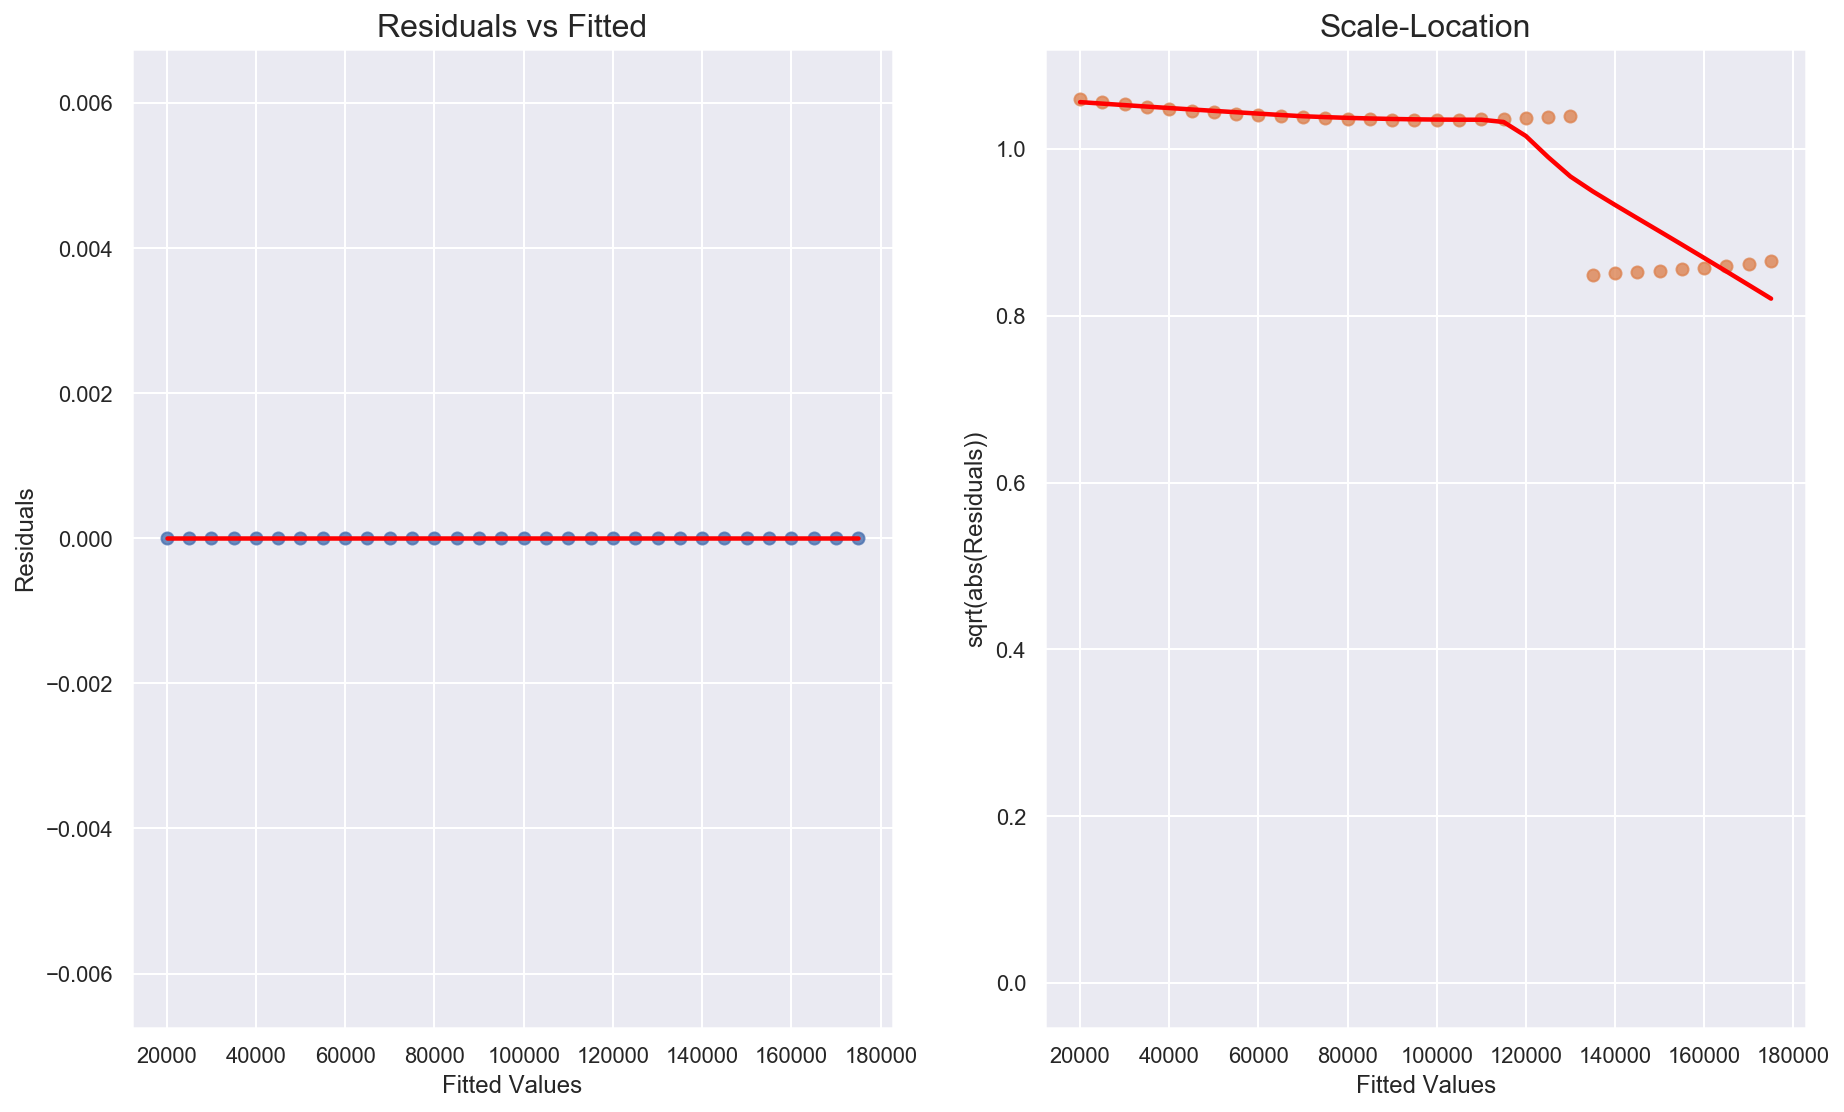

In [301]:
# Graphical test
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

In [302]:
# statistical test - goldfeld quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 1.972343659537861e+28), ('p-value', 1.47787997760096e-195)]

#### MULTICOLLINEARITY CHECK

In [308]:
dataframe_linear.corr()

,Age,Experience,Salary
Age,1.0,1.0,1.0
Experience,1.0,1.0,1.0
Salary,1.0,1.0,1.0


In [ ]:
'''
the dataset prepared is exhiniting highest multicollinearity with value 1. This is generally not observed in
the real life datasets.

'''

In [309]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Age,Experience
vif,inf,inf


In [ ]:
'''
the vif value is extremely high(infinity) as it is the ideal case of highest multicollinearity.
'''

## DATA 

In [131]:
mydict = {}

In [132]:
# let's create a parabolic dataset
for r in range(-1,-151,-1):
    if r==-1:
        mydict['Radius']=[r]
        mydict['Area']=[3.14*r*r]
    else:
        mydict['Radius'].append(r)
        mydict['Area'].append(3.14*r*r)

In [133]:
data_nonlinear1 = pd.DataFrame(mydict)

In [134]:
data_nonlinear1.head()

,Radius,Area
0,-1,3.14
1,-2,12.56
2,-3,28.26
3,-4,50.24
4,-5,78.50


In [135]:
mydict1 = {}

In [136]:
# let's create a parabolic dataset
for r in range(1,151):
    if r==1:
        mydict1['Radius']=[r]
        mydict1['Area']=[3.14*r*r]
    else:
        mydict1['Radius'].append(r)
        mydict1['Area'].append(3.14*r*r)

In [137]:
data_nonlinear2 = pd.DataFrame(mydict1)

In [138]:
data_nonlinear2.head()

,Radius,Area
0,1,3.14
1,2,12.56
2,3,28.26
3,4,50.24
4,5,78.50


In [139]:
data = pd.concat([data_nonlinear1,data_nonlinear2])
data.head()

,Radius,Area
0,-1,3.14
1,-2,12.56
2,-3,28.26
3,-4,50.24
4,-5,78.50


In [140]:
data.shape

(300, 2)

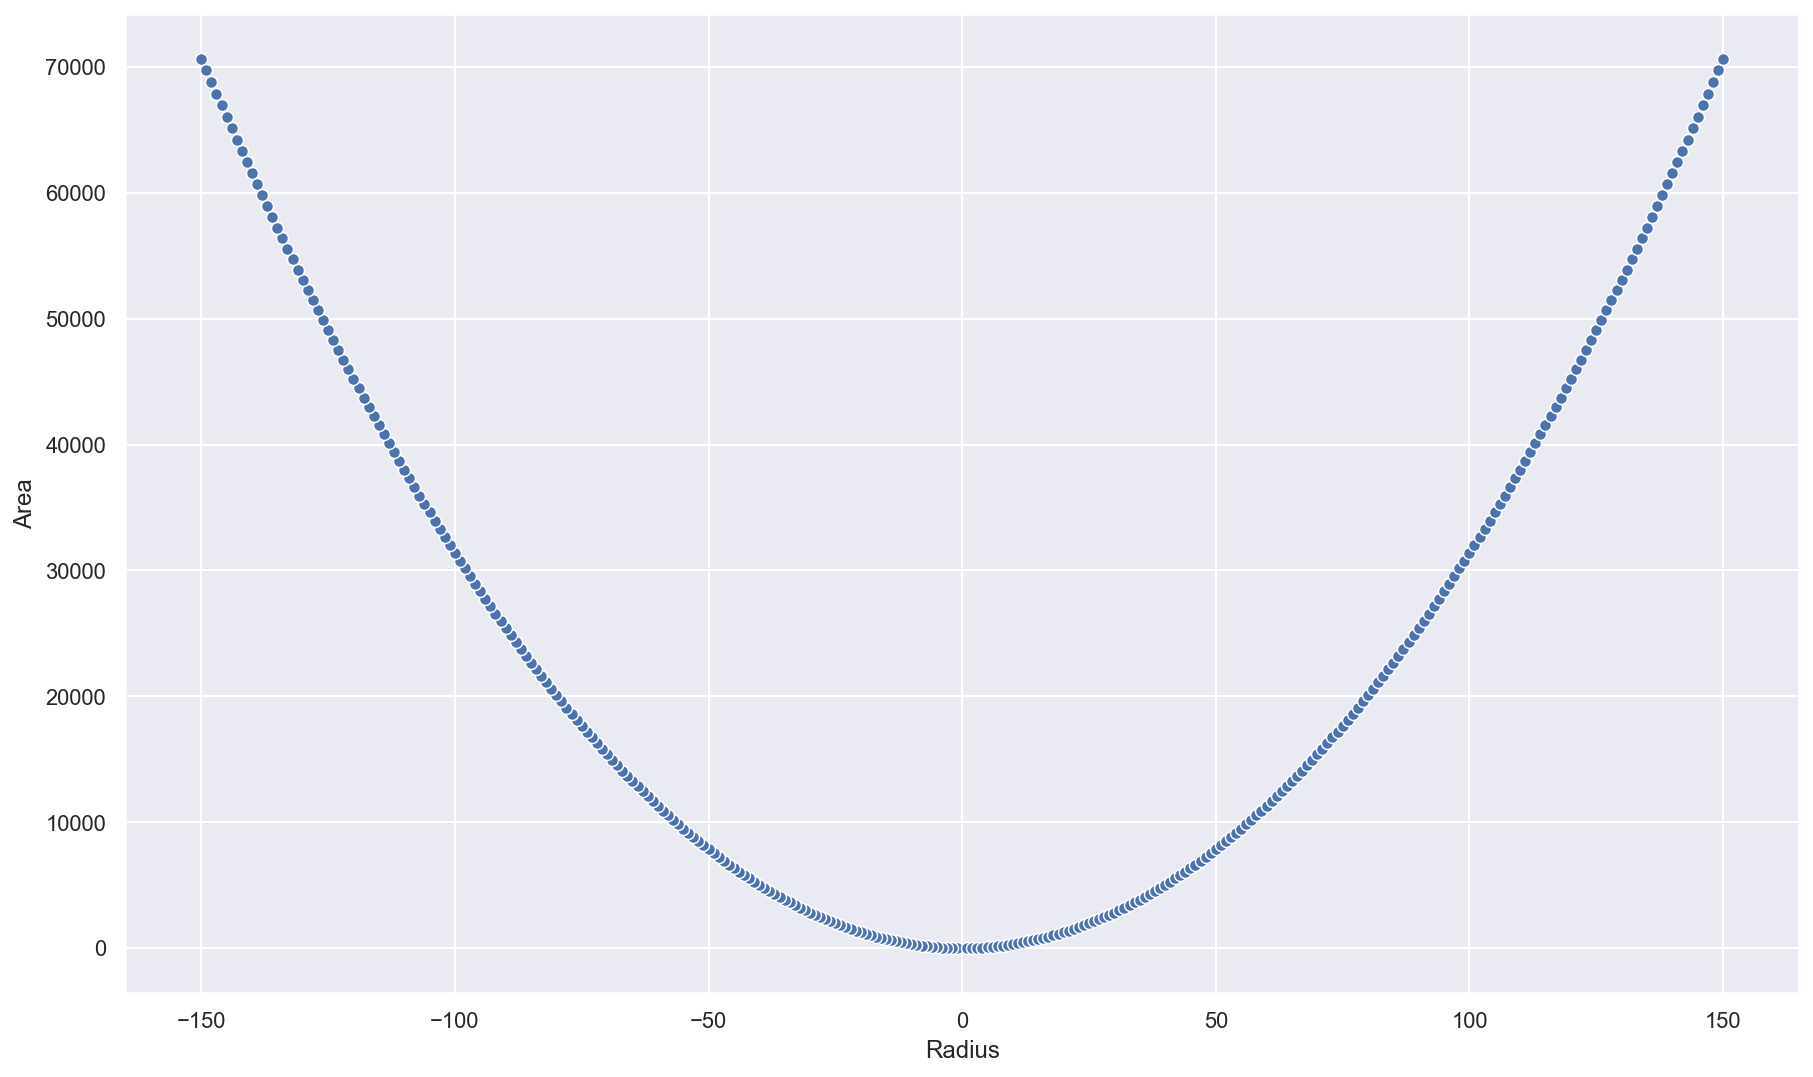

In [141]:
sns.scatterplot(x='Radius',y='Area',data=data)

## Linearity of non-linear data

Use Feature Engineering to deal with Non-Linearity

Linear Regression works by essentially fitting a (straight)line of best fit through your data.
This is all good when we work with a simple "toy" dataset , but what happens if our data looks something like this?

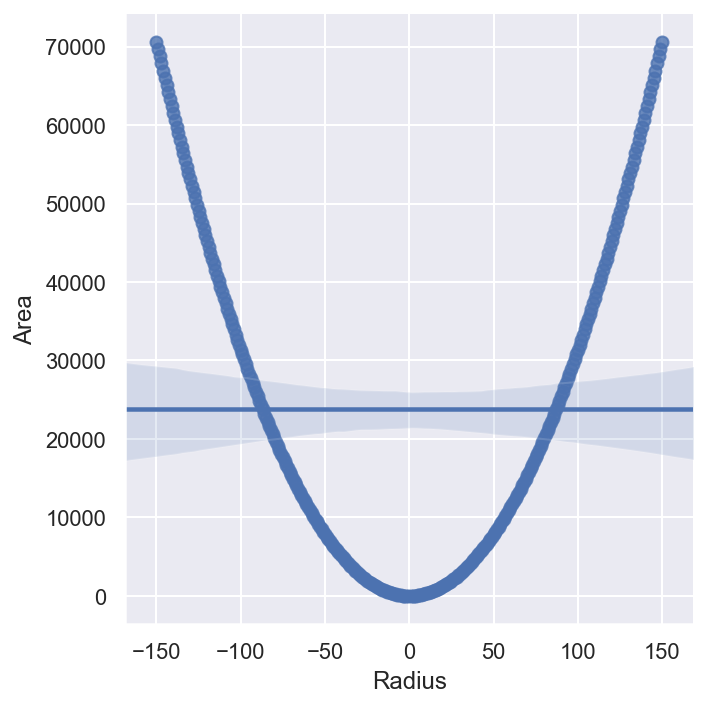

In [142]:
sns.lmplot(x='Radius',y='Area',data=data)

Fitting a straight regression line to this data will result in the overprediction of the output variable (y) for input variable (x) values in the middle of the range under consideration , and underprediction for x values at either extreme of the range

To capture the true structure if this data, we need to fit a polynomial curve to our data,but this can't be done within the constraints of linear regression (as per what we studied) 

But, BY ENGINEERING NEW FEATURES that are functions of our existing input variables(including powers,logs,products of pairs of variables),it is POSSIBLE to USE LINEAR REGRESSION to FIT something OTHER THAN a straight LINE to our data.

## Normality And Homoscedaticity of skewed data

#### QUESTION : CAN NON-LINEAR DATA HAVE THE RESIDUALS SPREAD WITH CONSTANT VARIANCE?

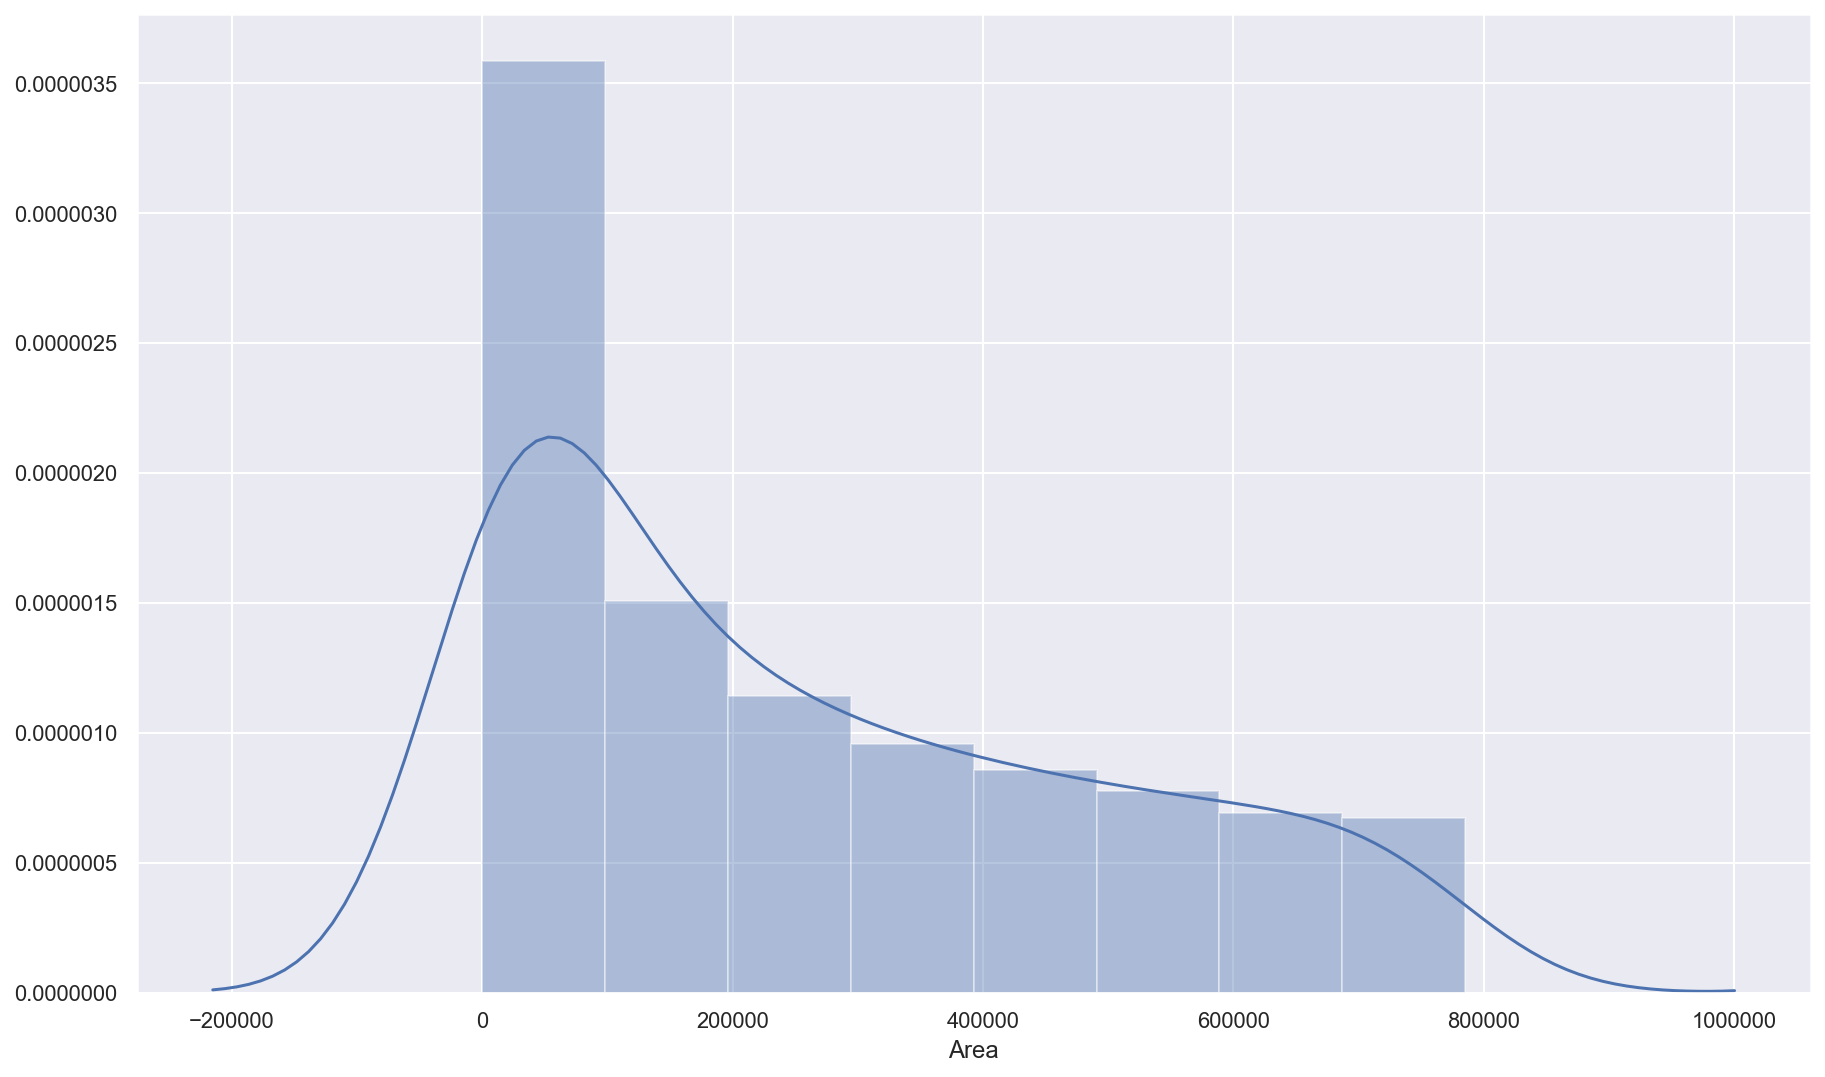

In [121]:
sns.distplot(data_nonlinear['Area'])

In [125]:
data_nonlinear['Area'].skew()

0.6397122027104032

In [126]:
gamma_data['Y'].skew()

5.202420375050534

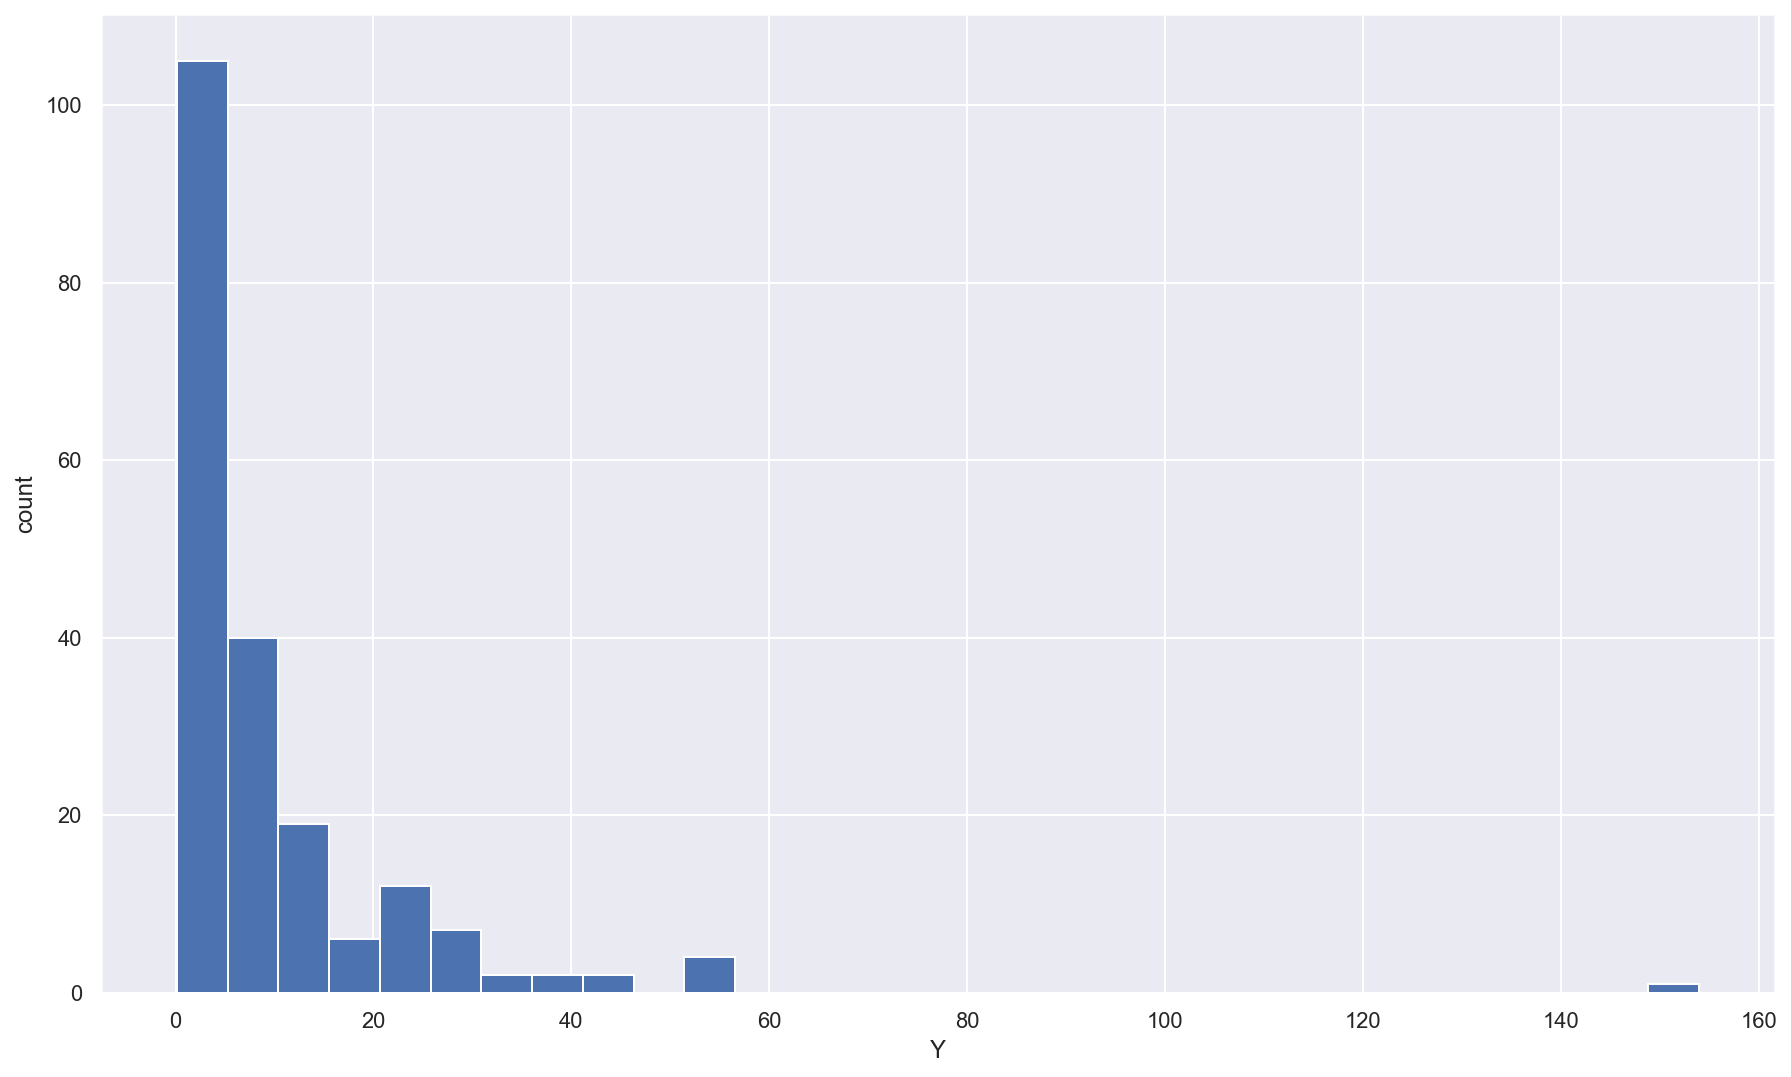

In [99]:
# create skewed data
np.random.seed(1)

x1 = np.random.uniform(-1,1,200)
x2 = np.random.uniform(-1,1,200)

mu = np.exp(1 + x1 + 2*x2 + np.random.randn())
y = np.random.gamma(shape=2,scale=mu/2,size=200)
gamma_data = pd.DataFrame({'X1':x1,'X2':x2,'Y':y})

#plot data

plt.hist(gamma_data['Y'],bins=30)
plt.ylabel('count')
plt.xlabel('Y')
plt.show()

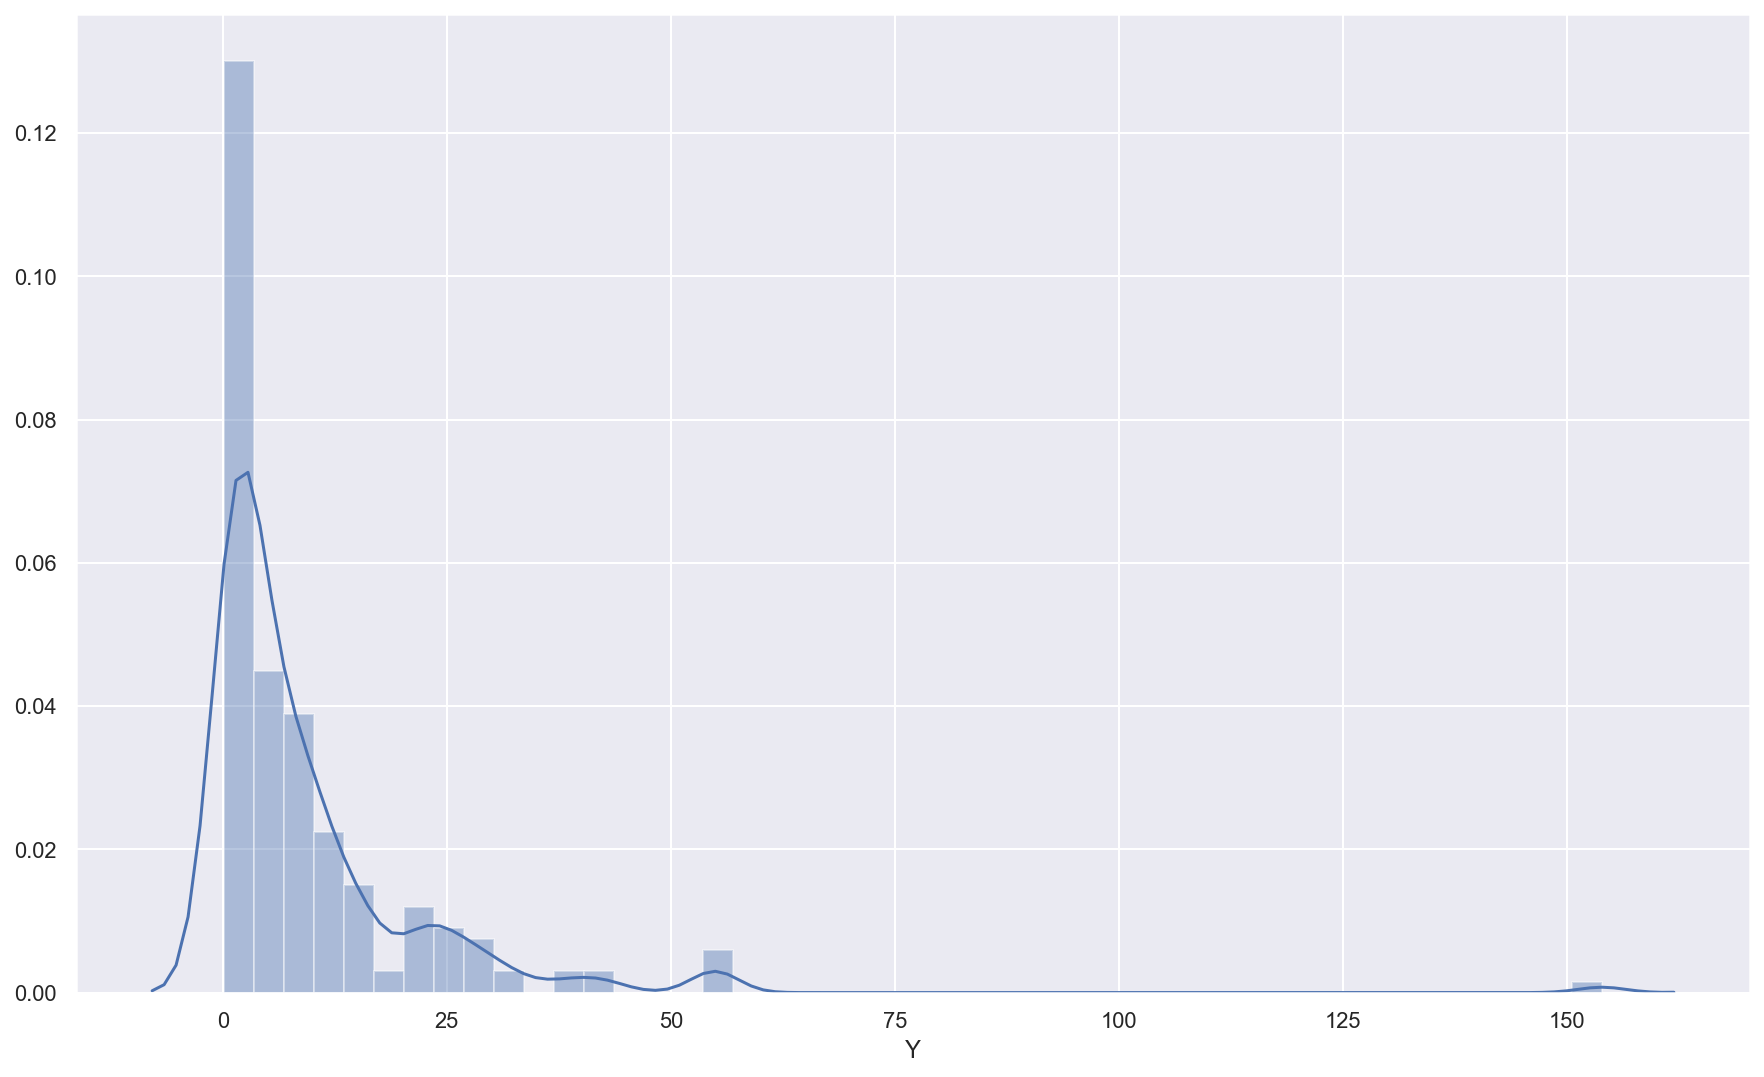

In [120]:
sns.distplot(gamma_data['Y'])

Fitting a linear regression model to this dataset without first transforming our output variable, then plotting the residuals against the fitted values of our output variable gives us the following residual plot :-

In [104]:
X = gamma_data.drop(['Y'],axis=1)
y = gamma_data['Y']

In [107]:
#fit the lr model
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
predictions = lin_reg.predict(X_constant)
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     51.55
Date:                Sat, 24 Oct 2020   Prob (F-statistic):           9.88e-19
Time:                        10:43:58   Log-Likelihood:                -784.28
No. Observations:                 200   AIC:                             1575.
Df Residuals:                     197   BIC:                             1584.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9346      0.877     10.192      0.000       7.206      10.663
X1             7.1034      1.427      4.977      0.000       4.289       9.918
X2            14.3075      1.560      9.170      0.000      11.231      17.384
==============================================================================
Omnibus:                      283.987   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30092.145
Skew:                           6.172   Prob(JB):                         0.00
Kurtosis:                      61.810   Cond. No.                         1.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# residuals
resid = y - predictions

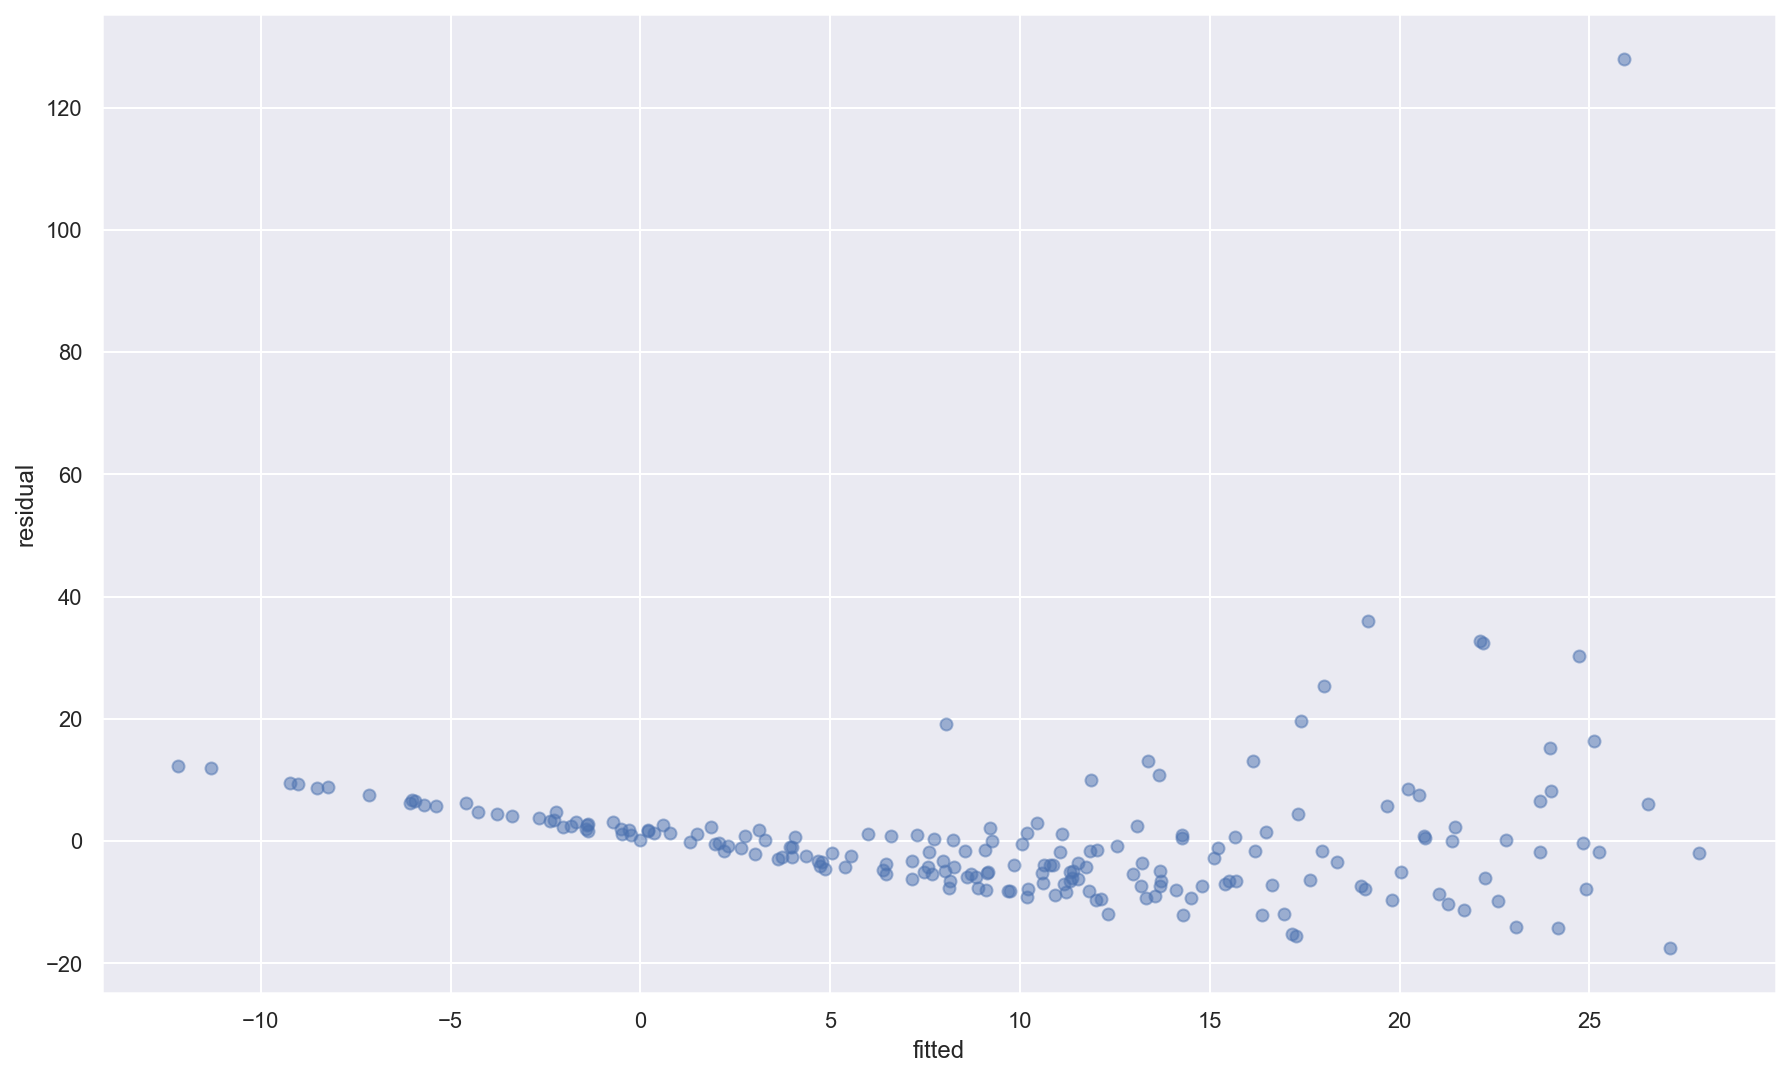

In [110]:
# plot residuals
plt.scatter(predictions,resid,alpha=0.5)
plt.xlabel('fitted')
plt.ylabel('residual')
plt.show()

The spread of the points on this scatterplot increase moving from left to right, which is a clear sign of heteroscadasticity , which is a violation of the homoscedasticity assumption.


To deal with this issue, we can transform our output variable to make it symmetric prior to fitting our model, for example, by taking its log or squareroot, as shown below :-

In [112]:
#Transform y by taking the log of it

gamma_data.loc[:,'log_y'] = gamma_data['Y'].apply(lambda x:np.log(x))


In [114]:
X = gamma_data.drop(['Y','log_y'],axis=1)
y = gamma_data['log_y']

In [117]:
# Refit linear Regression to the transformed data
X_constant = sm.add_constant(X)
lin_reg1 = sm.OLS(y,X_constant).fit()
predictions1 = lin_reg1.predict(X_constant)
lin_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     244.9
Date:                Sat, 24 Oct 2020   Prob (F-statistic):           3.82e-54
Time:                        10:52:17   Log-Likelihood:                -225.37
No. Observations:                 200   AIC:                             456.7
Df Residuals:                     197   BIC:                             466.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3284      0.054     24.783      0.000       1.223       1.434
X1             0.7849      0.087      8.994      0.000       0.613       0.957
X2             1.9830      0.095     20.787      0.000       1.795       2.171
==============================================================================
Omnibus:                       15.583   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.992
Skew:                          -0.562   Prob(JB):                     7.52e-05
Kurtosis:                       4.008   Cond. No.                         1.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
# residuals
resid1 = y - predictions1

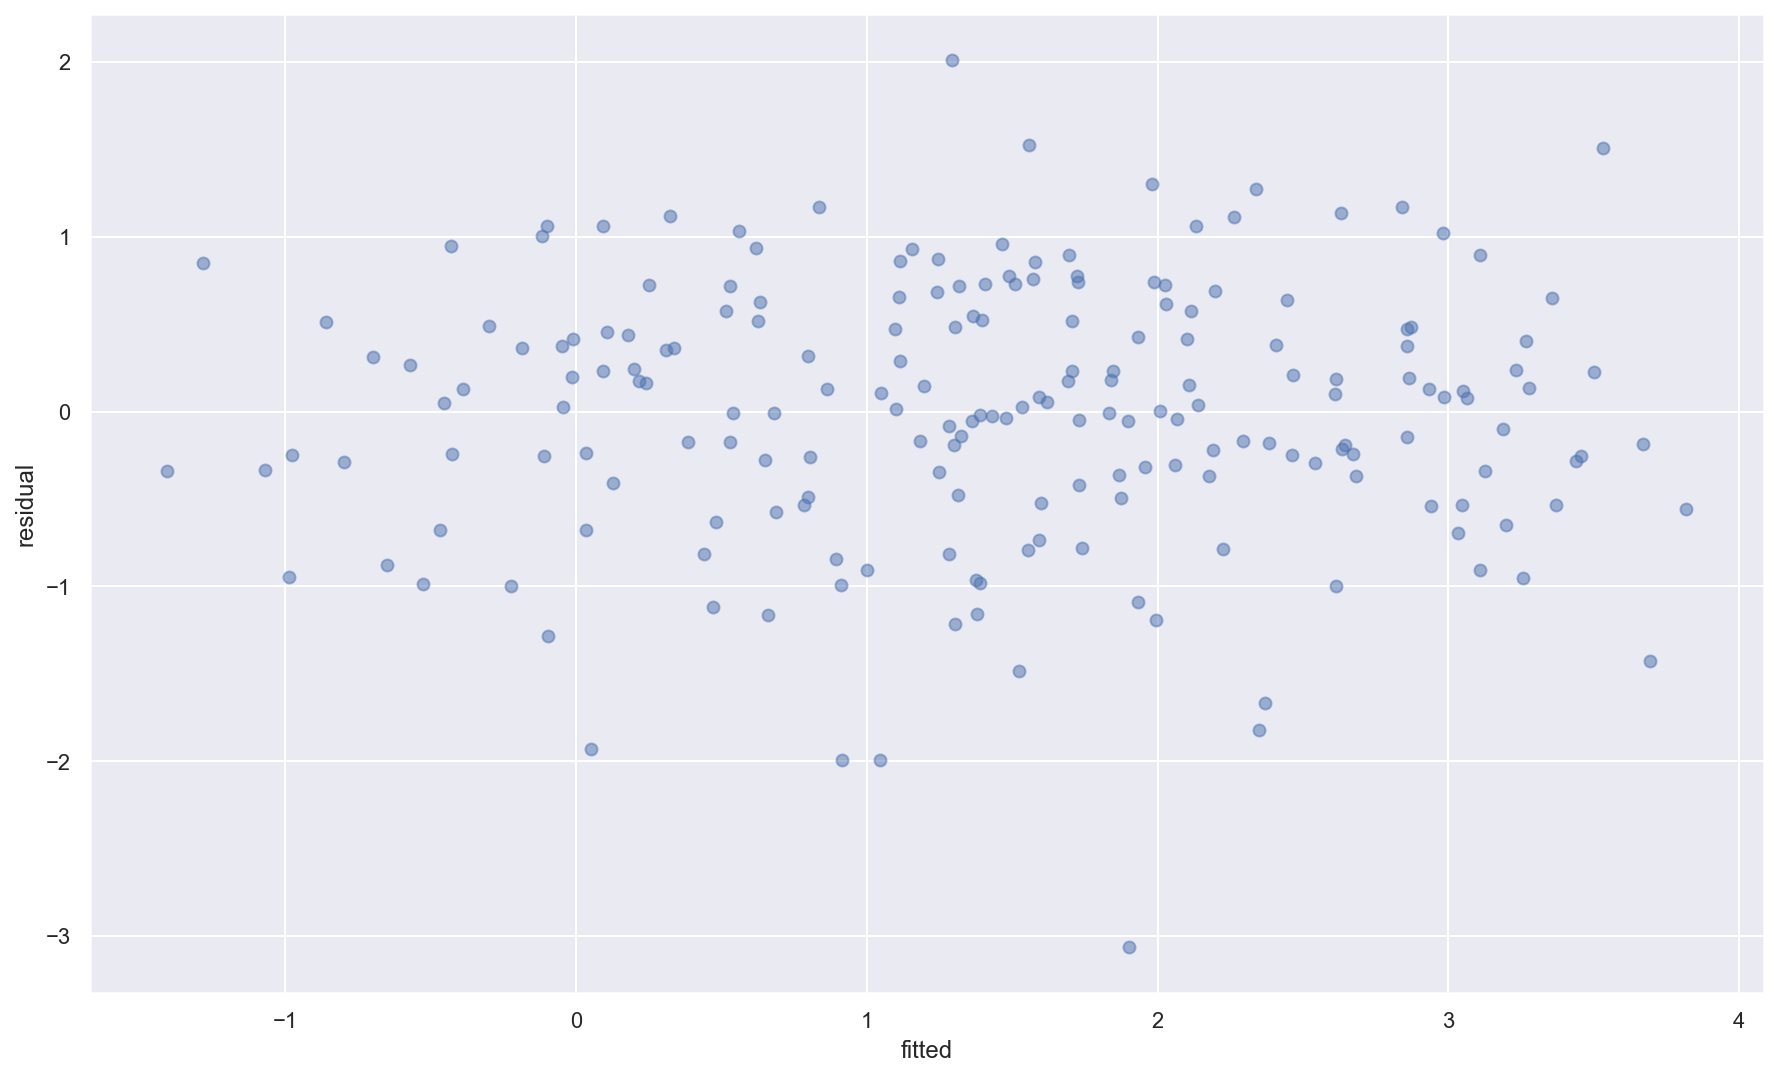

In [119]:
plt.scatter(predictions1,resid1,alpha=0.5)
plt.xlabel('fitted')
plt.ylabel('residual')
plt.show()

The residuals of this model now demonstrate constant spread, indicating homoskedasticity.